In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
scientistData = pd.read_csv('Top_scientists_2023.csv')
scientistData.head()
scientistData.shape


(217097, 47)

In [3]:
#Cutting to top 100k 
sci100k_Data = scientistData[:-117097]
sci100k_Data.head(20)

authfull                                       inst_name  \
0       Graetzel, Michael        École Polytechnique Fédérale de Lausanne   
1         Wang, Zhong Lin                     Chinese Academy of Sciences   
2      Willett, Walter C.       Harvard T.H. Chan School of Public Health   
3           Kresse, Georg                                Universität Wien   
4      Kessler, Ronald C.                          Harvard Medical School   
5           Friston, Karl                       University College London   
6      Altman, Douglas G.  University of Oxford Medical Sciences Division   
7        McEwen, Bruce S.                          Rockefeller University   
8   Whitesides, George M.            Harvard Faculty of Arts and Sciences   
9          Witten, Edward                    Institute for Advanced Study   
10       Barnes, Peter J.               National Heart and Lung Institute   
11        Perdew, John P.                               Tulane University   
12       Halliwell, Barry                National University of Singapore   
13           Ridker, Paul                          Harvard Medical School   
14         Karin, Michael                 UC San Diego School of Medicine   
15        Bandura, Albert                             Stanford University   
16      Semenza, Gregg L.     Johns Hopkins University School of Medicine   
17           Yusuf, Salim                             McMaster University   
18           Libby, Peter                    Brigham and Women's Hospital   
19         Langer, Robert           Massachusetts Institute of Technology   

   cntry  np6023  firstyr  lastyr  rank (ns)  nc9623 (ns)  h23 (ns)  \
0    che    1760     1971    2024          1       365234       270   
1    chn    2644     1986    2025          2       279327       250   
2    usa    2416     1970    2024          3       346654       306   
3    aut     388     1992    2024          4       297085       109   
4    usa    1098     1975    2024          5       267255       237   
5    gbr    1270     1989    2024          6       188600       200   
6    gbr    1043     1972    2024          7       566794       254   
7    usa    1205     1959    2023          8       153846       190   
8    usa    1389     1962    2023          9       244615       223   
9    usa     319     1970    2024         10       101514       137   
10   gbr    1872     1974    2024         11       146952       186   
11   usa     351     1970    2024         12       300498        92   
12   sgp     724     1965    2024         13       113708       156   
13   usa    1189     1985    2024         14       214130       214   
14   usa     710     1979    2024         15       208736       226   
15   usa     193     1953    2024         16       111248        99   
16   usa     492     1984    2024         17       120758       167   
17   can    1584     1979    2024         18       254242       230   
18   usa     970     1972    2024         19       161034       197   
19   usa    1849     1974    2024         20       243723       240   

     hm23 (ns)  ...  nc9623_rw                       sm-subfield-1  \
0   117.269725  ...        125        Nanoscience & Nanotechnology   
1   129.899914  ...        162        Nanoscience & Nanotechnology   
2   122.561857  ...        174                        Epidemiology   
3    49.890597  ...         34                     Applied Physics   
4    86.248917  ...         69                          Psychiatry   
5   106.582984  ...         45            Neurology & Neurosurgery   
6   106.984801  ...        318         General & Internal Medicine   
7   111.878948  ...         45            Neurology & Neurosurgery   
8   113.458896  ...         68                   General Chemistry   
9   108.916667  ...         20          Nuclear & Particle Physics   
10  116.225982  ...        201                  Respiratory System   
11   48.185786  ...         72                     Applied Physics 

In [7]:
sci100k_Data.columns

Index(['authfull', 'inst_name', 'cntry', 'np6023', 'firstyr', 'lastyr',
       'rank (ns)', 'nc9623 (ns)', 'h23 (ns)', 'hm23 (ns)', 'nps (ns)',
       'ncs (ns)', 'cpsf (ns)', 'ncsf (ns)', 'npsfl (ns)', 'ncsfl (ns)',
       'c (ns)', 'npciting (ns)', 'cprat (ns)', 'np6023 cited9623 (ns)',
       'self%', 'rank', 'nc9623', 'h23', 'hm23', 'nps', 'ncs', 'cpsf', 'ncsf',
       'npsfl', 'ncsfl', 'c', 'npciting', 'cprat', 'np6023 cited9623',
       'np6023_rw', 'nc9623_to_rw', 'nc9623_rw', 'sm-subfield-1',
       'sm-subfield-1-frac', 'sm-subfield-2', 'sm-subfield-2-frac', 'sm-field',
       'sm-field-frac', 'rank sm-subfield-1', 'rank sm-subfield-1 (ns)',
       'sm-subfield-1 count'],
      dtype='object')

In [9]:
#restrict to "self-citations excluded" dataset
sci100k = sci100k_Data.drop(['authfull', 'inst_name', 'cntry', 'rank (ns)', 'nc9623 (ns)', 'h23 (ns)', 'hm23 (ns)', 'nps (ns)',
       'ncs (ns)', 'cpsf (ns)', 'ncsf (ns)', 'npsfl (ns)', 'ncsfl (ns)',
       'c (ns)', 'npciting (ns)', 'cprat (ns)', 'np6023 cited9623 (ns)', 'sm-subfield-1 count'], axis =1)

In [11]:
sci100k.shape

(100000, 29)

In [13]:
sci100k.columns

Index(['np6023', 'firstyr', 'lastyr', 'self%', 'rank', 'nc9623', 'h23', 'hm23',
       'nps', 'ncs', 'cpsf', 'ncsf', 'npsfl', 'ncsfl', 'c', 'npciting',
       'cprat', 'np6023 cited9623', 'np6023_rw', 'nc9623_to_rw', 'nc9623_rw',
       'sm-subfield-1', 'sm-subfield-1-frac', 'sm-subfield-2',
       'sm-subfield-2-frac', 'sm-field', 'sm-field-frac', 'rank sm-subfield-1',
       'rank sm-subfield-1 (ns)'],
      dtype='object')

In [15]:
##add in a feature actyr to reflect active years of research
sci100k['actyr'] = sci100k['lastyr'] - sci100k['firstyr']

##add in features npf (number of first authored papers) and ncf (total cites to first authored papers). 
#this is to create more features for us to analyse their correlation to rank
sci100k['npf'] = sci100k['cpsf'] - sci100k['nps']
sci100k['ncf'] = sci100k['ncsf'] - sci100k['ncs']

In [17]:
sci100k.head()

np6023  firstyr  lastyr   self%  rank  nc9623  h23        hm23  nps    ncs  \
0    1760     1971    2024  0.0692     2  392395  281  120.981965   59  30508   
1    2644     1986    2025  0.1475     1  327659  275  140.601151  115  22775   
2    2416     1970    2024  0.0917     3  381657  320  127.503846  123  12742   
3     388     1992    2024  0.0203     4  303251  117   51.704883    6  60117   
4    1098     1975    2024  0.0613     6  284705  249   89.943757   39   7088   

   ...  sm-subfield-1-frac          sm-subfield-2  sm-subfield-2-frac  \
0  ...            0.200796       Chemical Physics            0.123436   
1  ...            0.576952              Materials            0.101971   
2  ...            0.189627  Nutrition & Dietetics            0.164315   
3  ...            0.420103       Chemical Physics            0.252577   
4  ...            0.595628          Public Health            0.053734   

                            sm-field  sm-field-frac  rank sm-subfield-1  \
0  Enabling & Strategic Technologies       0.410694                   2   
1  Enabling & Strategic Technologies       0.739955                   1   
2                  Clinical Medicine       0.529461                   1   
3                Physics & Astronomy       0.884021                   1   
4                  Clinical Medicine       0.776867                   1   

   rank sm-subfield-1 (ns)  actyr  npf     ncf  
0                        1     53   24    1772  
1                        2     39  137   18234  
2                        1     54  115   25175  
3                        1     32   25  200568  
4                        1     49  197  124147  

[5 rows x 32 columns]

In [19]:
sci100k.columns

Index(['np6023', 'firstyr', 'lastyr', 'self%', 'rank', 'nc9623', 'h23', 'hm23',
       'nps', 'ncs', 'cpsf', 'ncsf', 'npsfl', 'ncsfl', 'c', 'npciting',
       'cprat', 'np6023 cited9623', 'np6023_rw', 'nc9623_to_rw', 'nc9623_rw',
       'sm-subfield-1', 'sm-subfield-1-frac', 'sm-subfield-2',
       'sm-subfield-2-frac', 'sm-field', 'sm-field-frac', 'rank sm-subfield-1',
       'rank sm-subfield-1 (ns)', 'actyr', 'npf', 'ncf'],
      dtype='object')

In [21]:
sci100k_1 = sci100k.drop(['firstyr', 'lastyr'], axis =1)

In [23]:
sci100k_1.columns

Index(['np6023', 'self%', 'rank', 'nc9623', 'h23', 'hm23', 'nps', 'ncs',
       'cpsf', 'ncsf', 'npsfl', 'ncsfl', 'c', 'npciting', 'cprat',
       'np6023 cited9623', 'np6023_rw', 'nc9623_to_rw', 'nc9623_rw',
       'sm-subfield-1', 'sm-subfield-1-frac', 'sm-subfield-2',
       'sm-subfield-2-frac', 'sm-field', 'sm-field-frac', 'rank sm-subfield-1',
       'rank sm-subfield-1 (ns)', 'actyr', 'npf', 'ncf'],
      dtype='object')

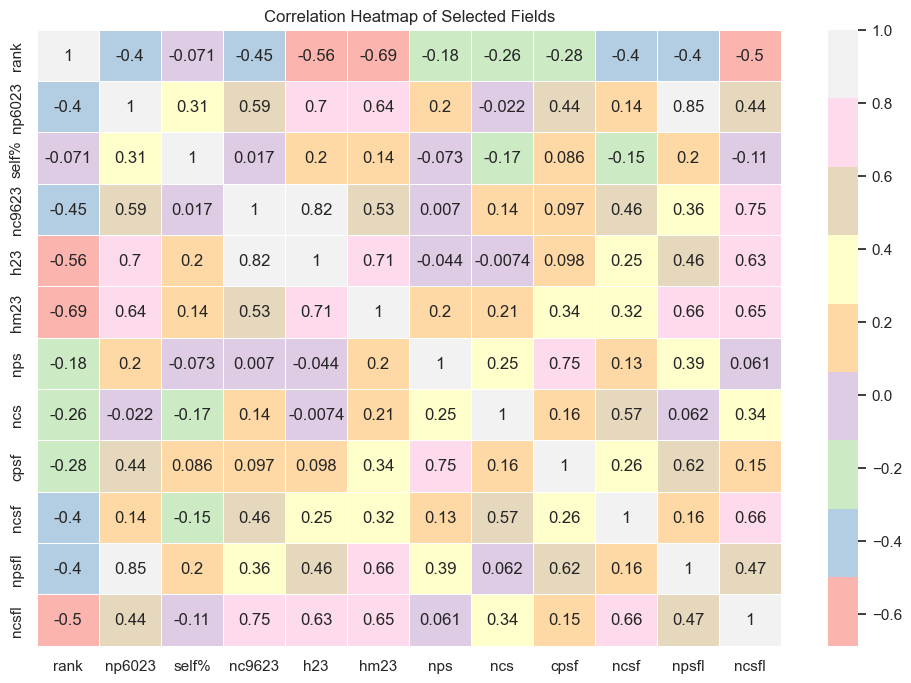

In [80]:
# Select the specified columns for correlation analysis
columns_of_interest = [
    'rank','np6023', 'self%', 'nc9623', 'h23', 'hm23', 'nps', 'ncs',
       'cpsf', 'ncsf', 'npsfl', 'ncsfl',
]

# Filter the dataset for the selected columns
correlation_data = sci100k_1[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Fields')
plt.show()

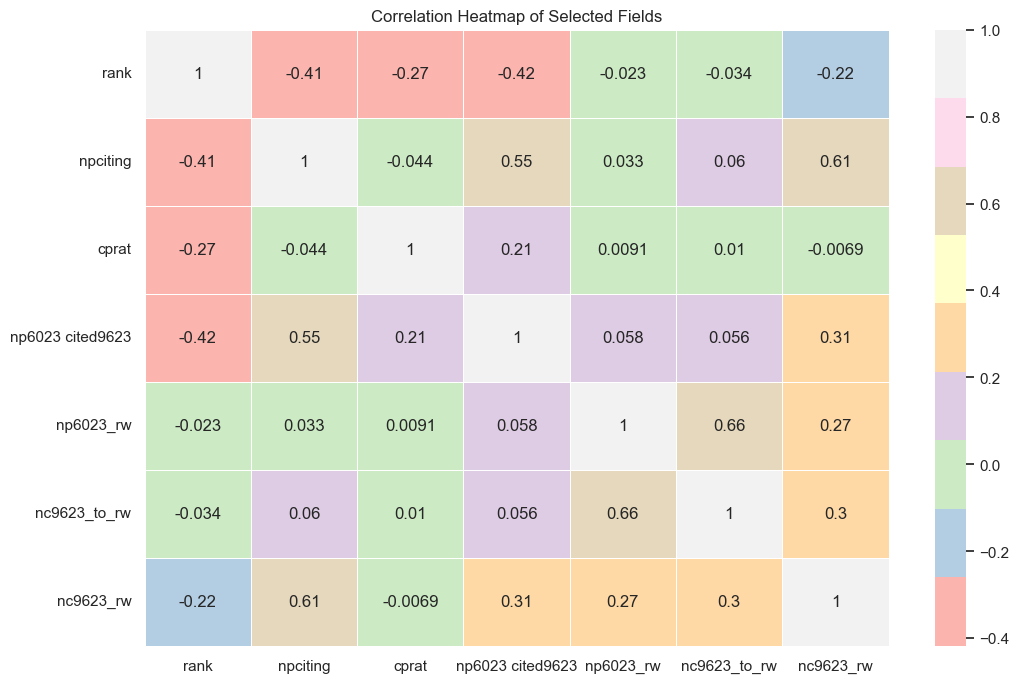

In [27]:
# Select the specified columns for correlation analysis
columns_of_interest = [
    'rank','npciting', 'cprat',
       'np6023 cited9623', 'np6023_rw', 'nc9623_to_rw', 'nc9623_rw',
]

# Filter the dataset for the selected columns
correlation_data = sci100k_1[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Fields')
plt.show()

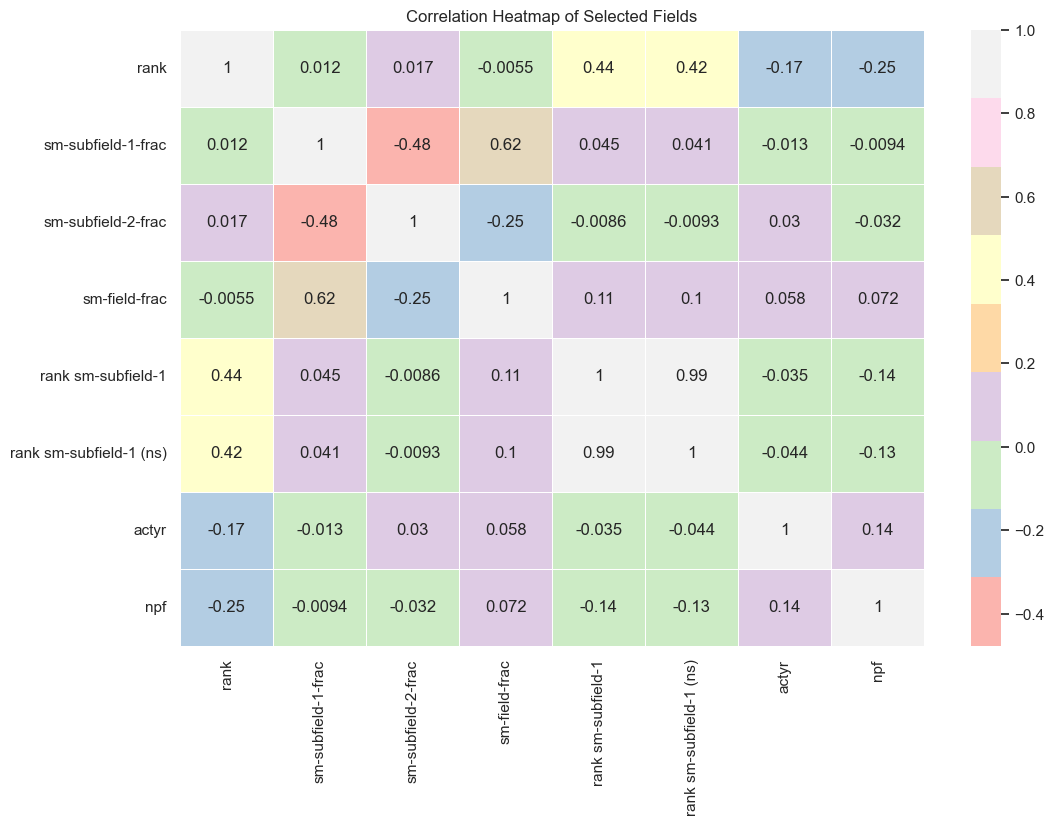

In [29]:
# Select the specified columns for correlation analysis
columns_of_interest = [
    'rank','sm-subfield-1-frac', 'sm-subfield-2-frac', 'sm-field-frac', 'rank sm-subfield-1',
       'rank sm-subfield-1 (ns)', 'actyr', 'npf', 
]

# Filter the dataset for the selected columns
correlation_data = sci100k_1[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Fields')
plt.show()

In [62]:
sci100k_numeric = sci100k_1.drop(['c', 'sm-subfield-1','sm-subfield-2','sm-field','ncf'], axis =1)


In [64]:
sci100k_numeric.columns

Index(['np6023', 'self%', 'rank', 'nc9623', 'h23', 'hm23', 'nps', 'ncs',
       'cpsf', 'ncsf', 'npsfl', 'ncsfl', 'npciting', 'cprat',
       'np6023 cited9623', 'np6023_rw', 'nc9623_to_rw', 'nc9623_rw',
       'sm-subfield-1-frac', 'sm-subfield-2-frac', 'sm-field-frac',
       'rank sm-subfield-1', 'rank sm-subfield-1 (ns)', 'actyr', 'npf'],
      dtype='object')

In [66]:
sci100k_numeric.head(5)

np6023   self%  rank  nc9623  h23        hm23  nps    ncs  cpsf    ncsf  \
0    1760  0.0692     2  392395  281  120.981965   59  30508    83   32280   
1    2644  0.1475     1  327659  275  140.601151  115  22775   252   41009   
2    2416  0.0917     3  381657  320  127.503846  123  12742   238   37917   
3     388  0.0203     4  303251  117   51.704883    6  60117    31  260685   
4    1098  0.0613     6  284705  249   89.943757   39   7088   236  131235   

   ...  np6023_rw  nc9623_to_rw  nc9623_rw  sm-subfield-1-frac  \
0  ...          1             8        125            0.200796   
1  ...          0             0        162            0.576952   
2  ...          0             0        174            0.189627   
3  ...          0             0         34            0.420103   
4  ...          0             0         69            0.595628   

   sm-subfield-2-frac  sm-field-frac  rank sm-subfield-1  \
0            0.123436       0.410694                   2   
1            0.101971       0.739955                   1   
2            0.164315       0.529461                   1   
3            0.252577       0.884021                   1   
4            0.053734       0.776867                   1   

   rank sm-subfield-1 (ns)  actyr  npf  
0                        1     53   24  
1                        2     39  137  
2                        1     54  115  
3                        1     32   25  
4                        1     49  197  

[5 rows x 25 columns]

In [69]:
sci100k_numeric.shape

(100000, 25)

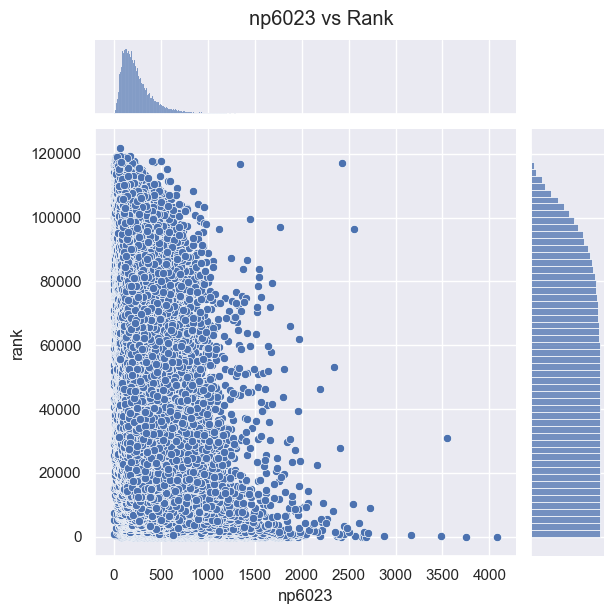

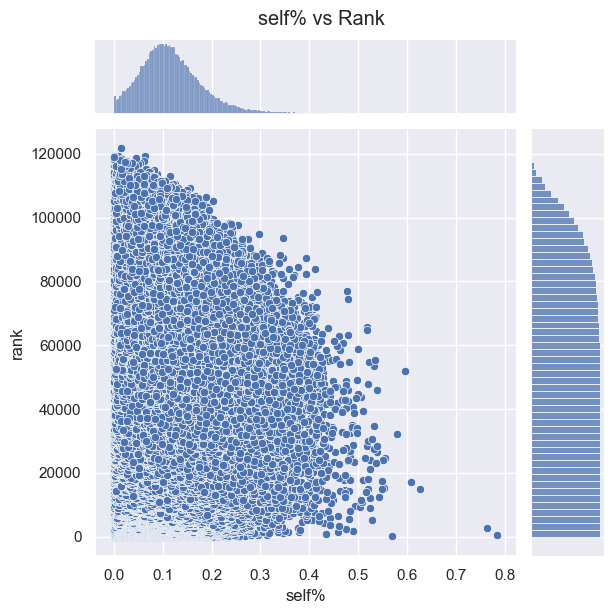

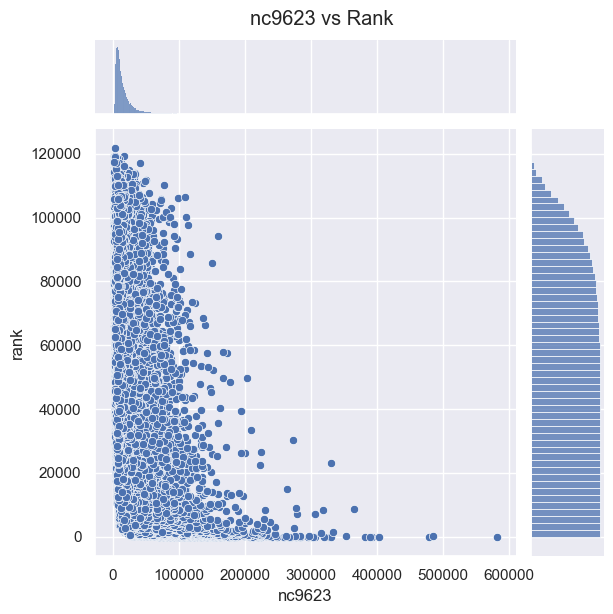

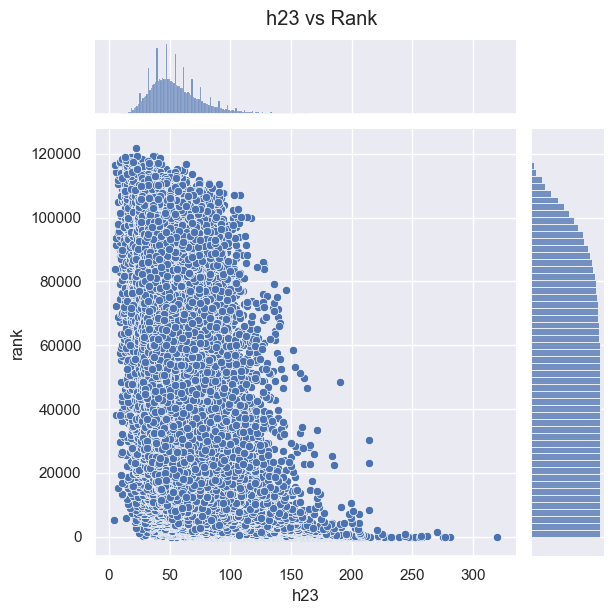

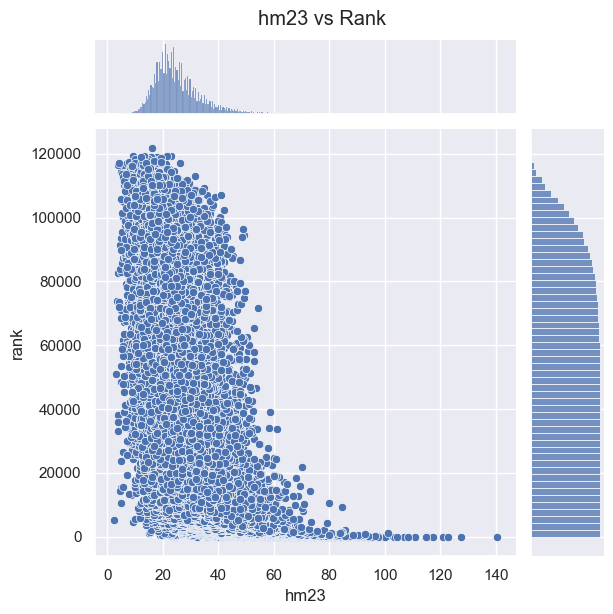

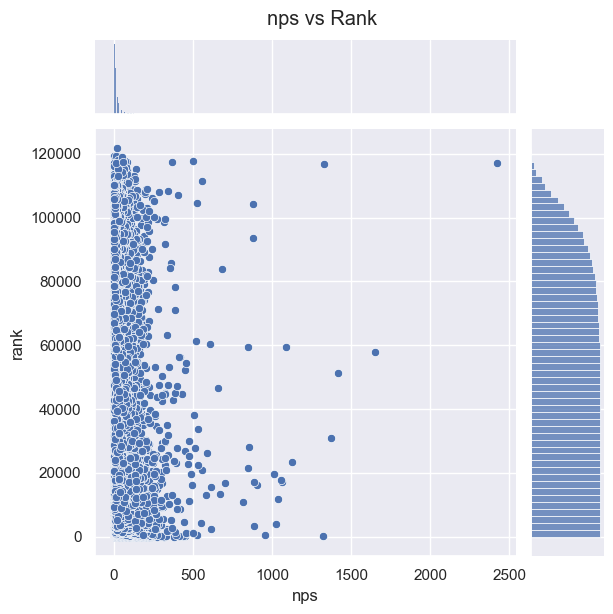

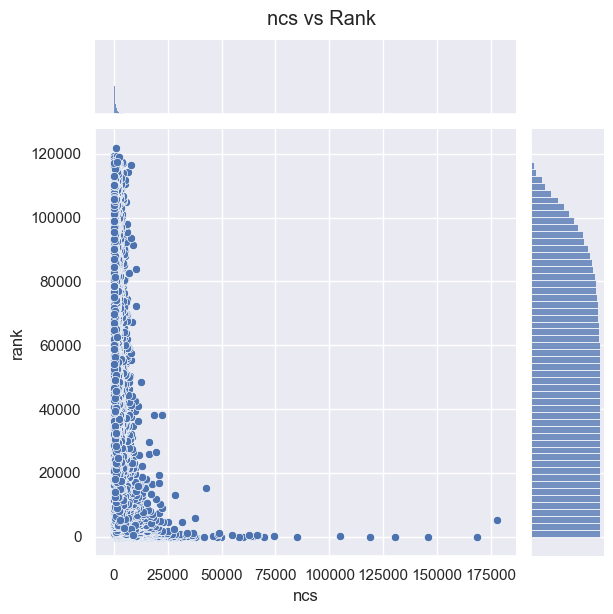

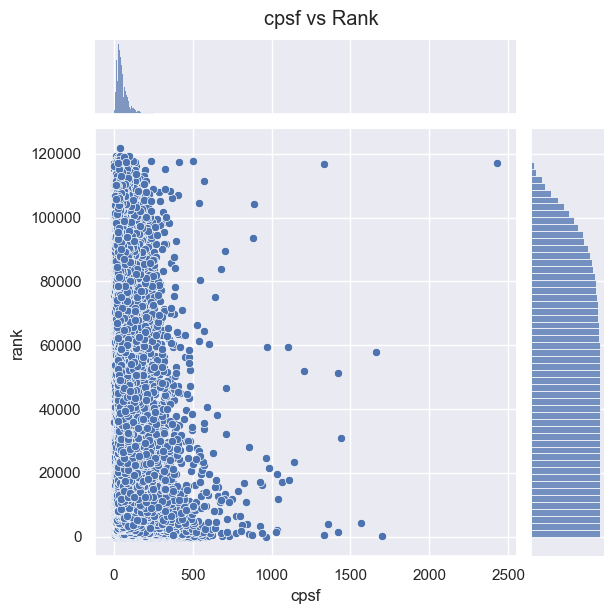

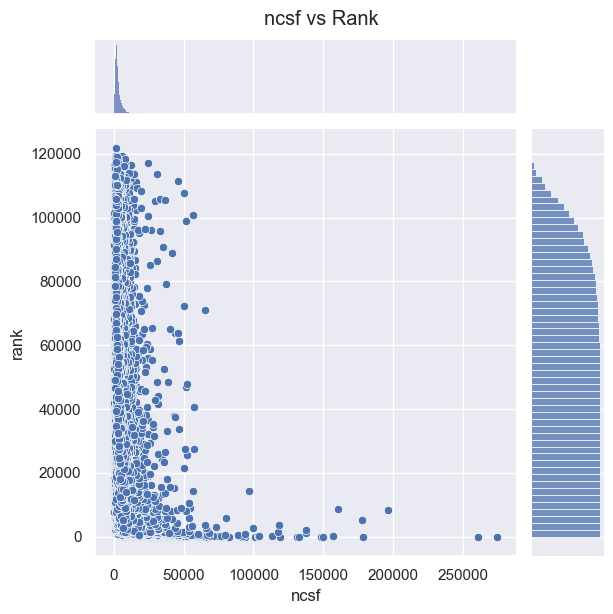

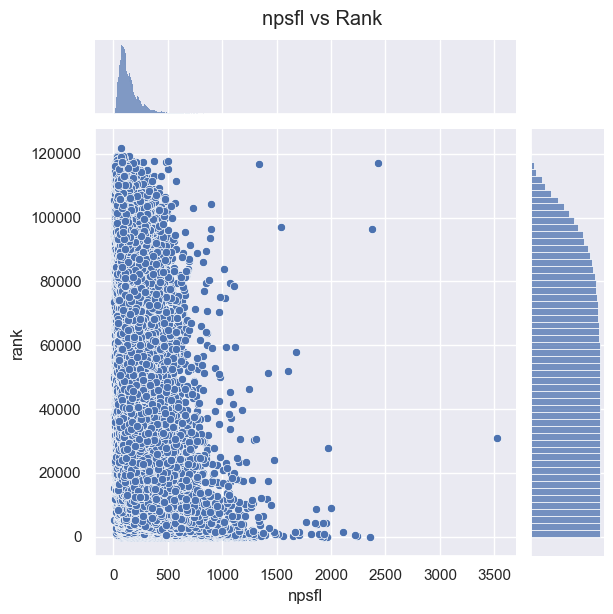

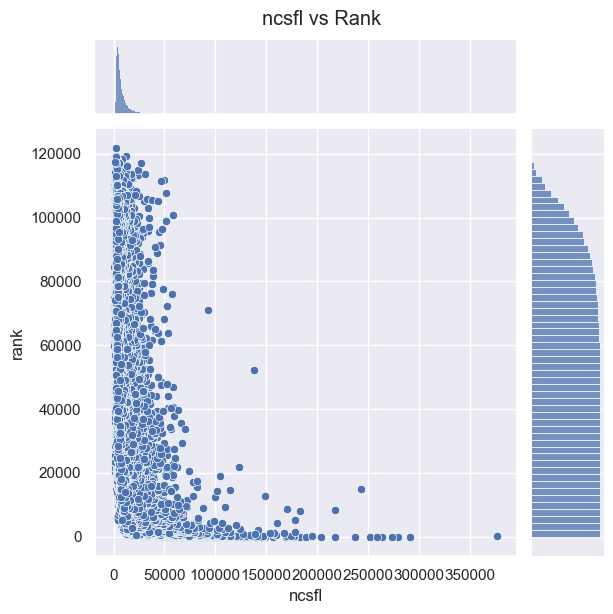

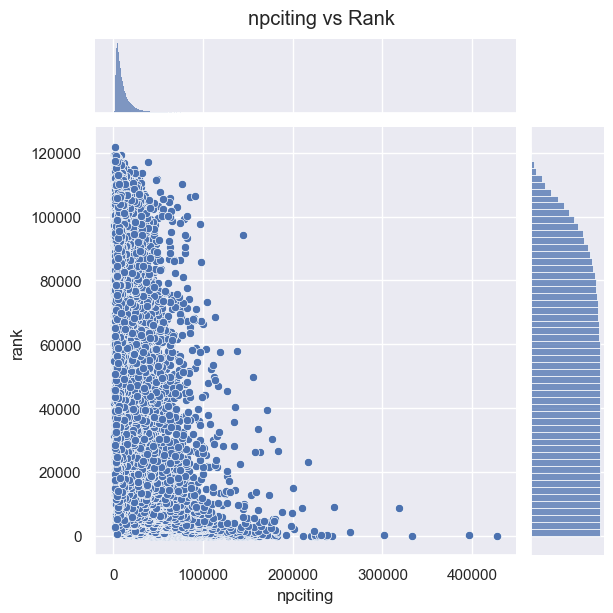

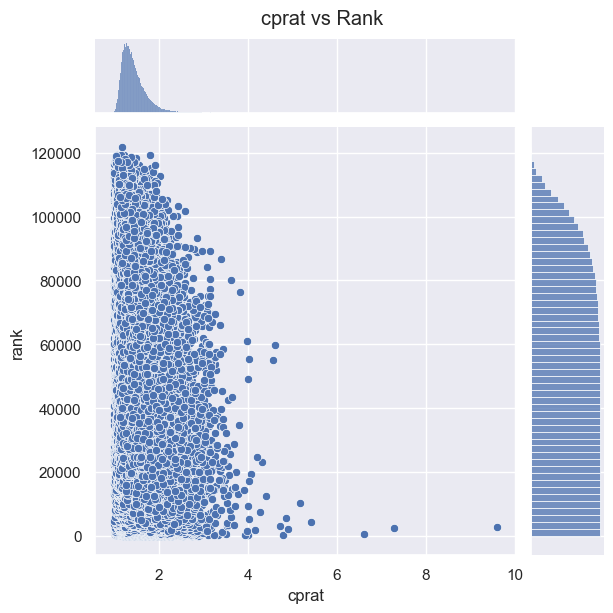

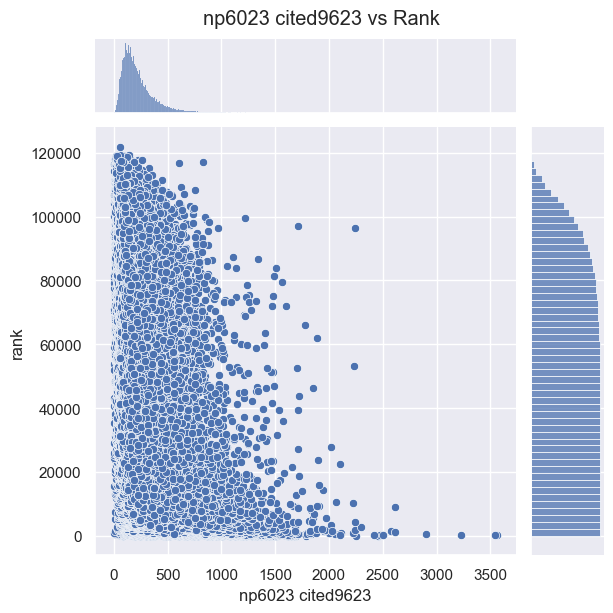

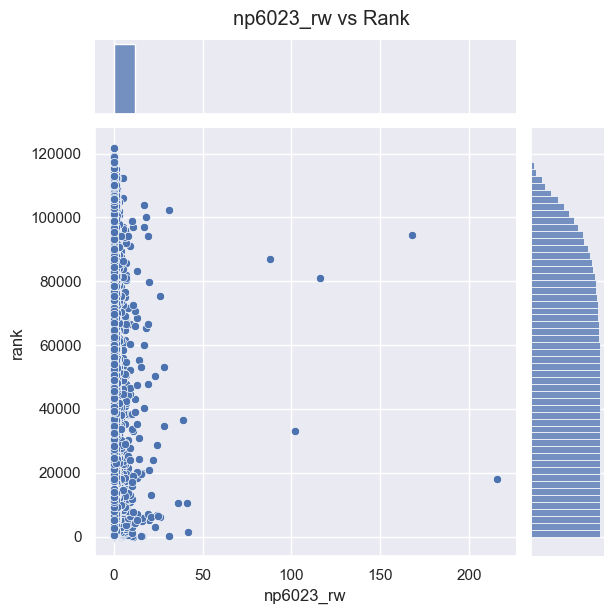

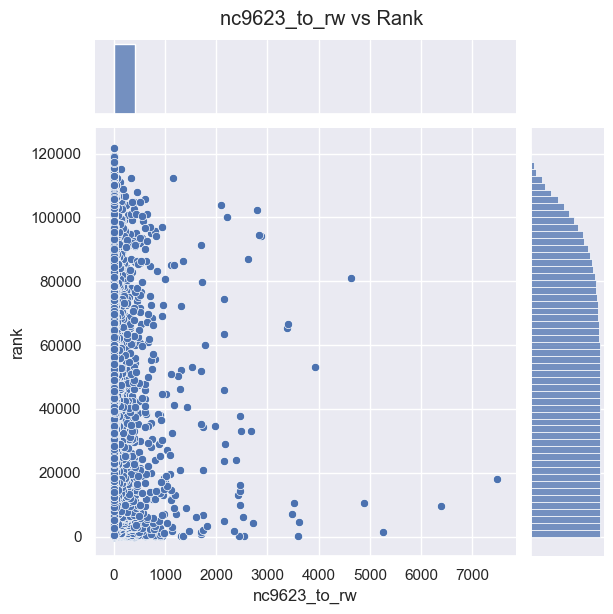

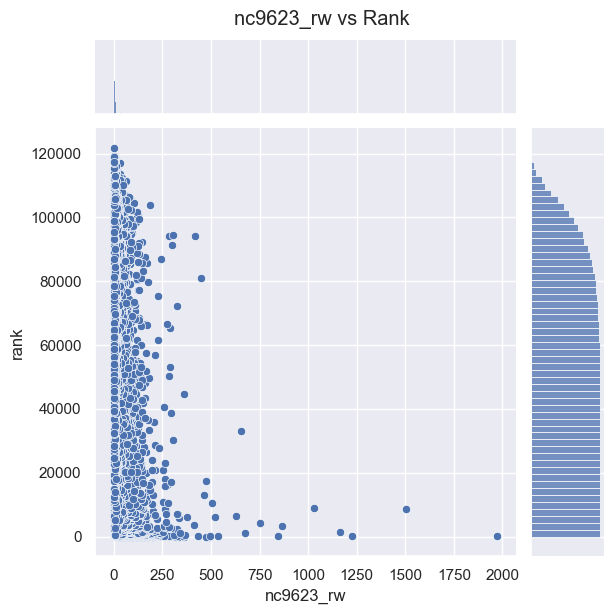

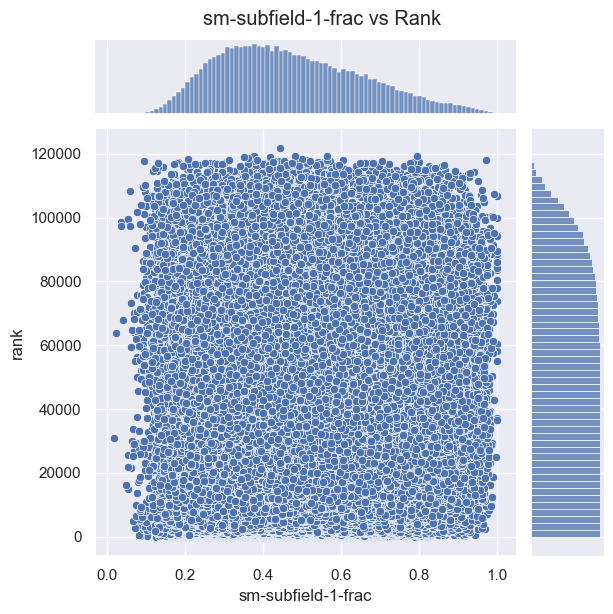

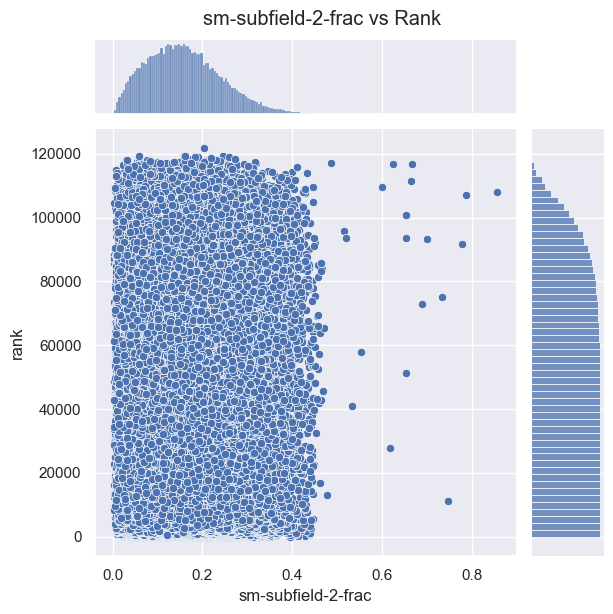

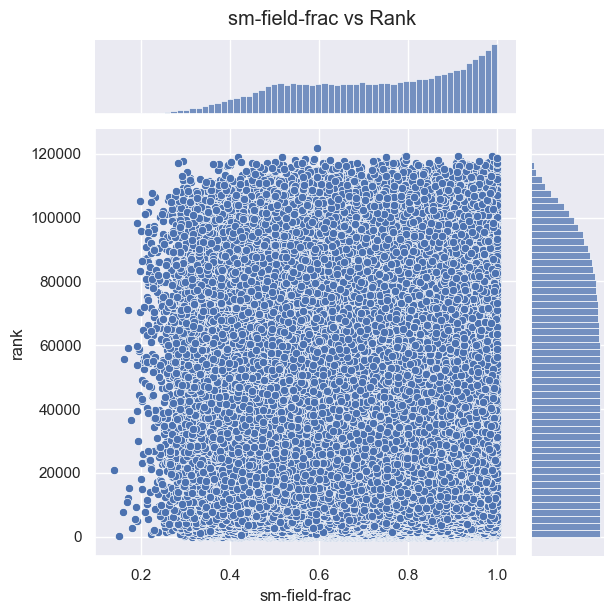

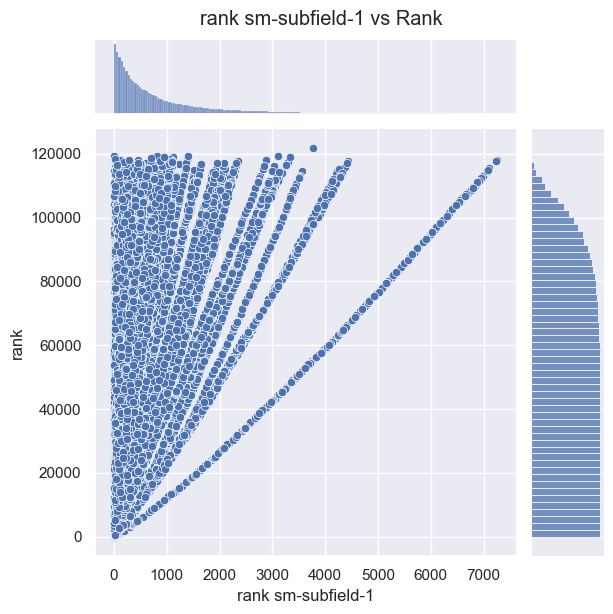

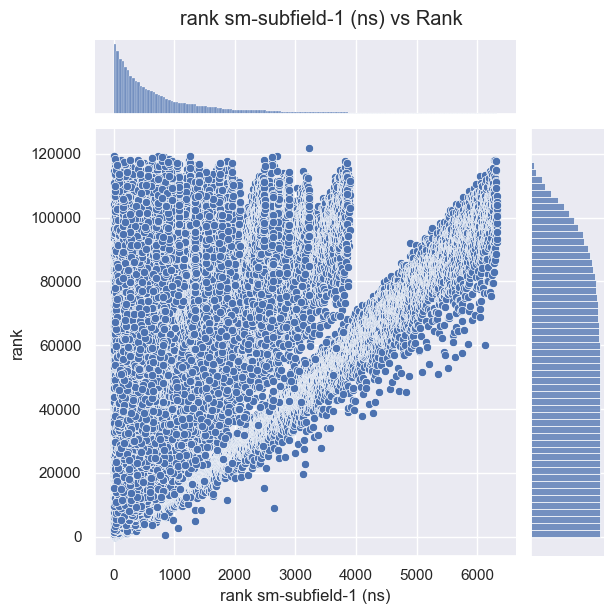

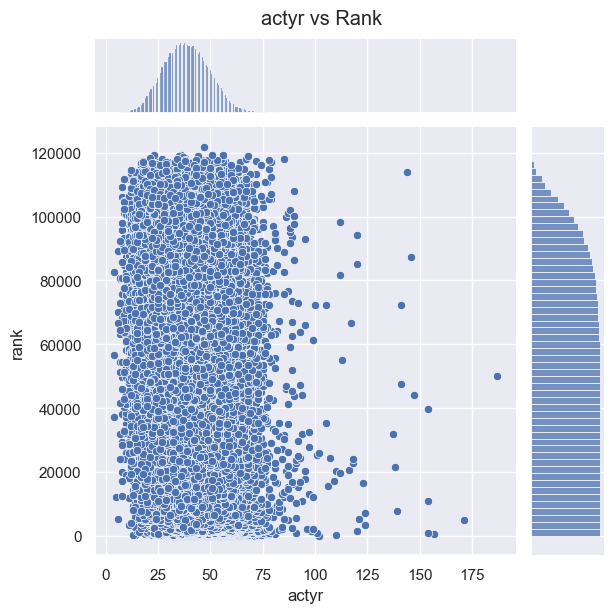

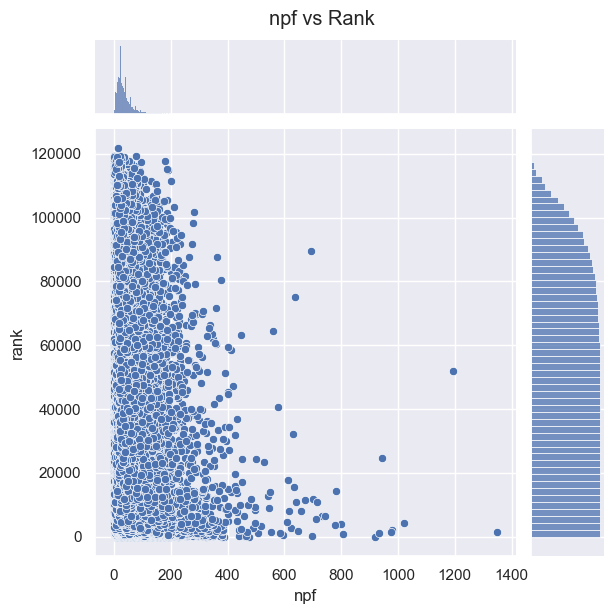

In [68]:
features = [col for col in sci100k_numeric.columns if col != 'rank']

for feature in features:
    joint = sb.jointplot(x=feature, y='rank', data=sci100k_numeric, kind='scatter')
    joint.fig.suptitle(f'{feature} vs Rank', y=1.02) 
    plt.show()

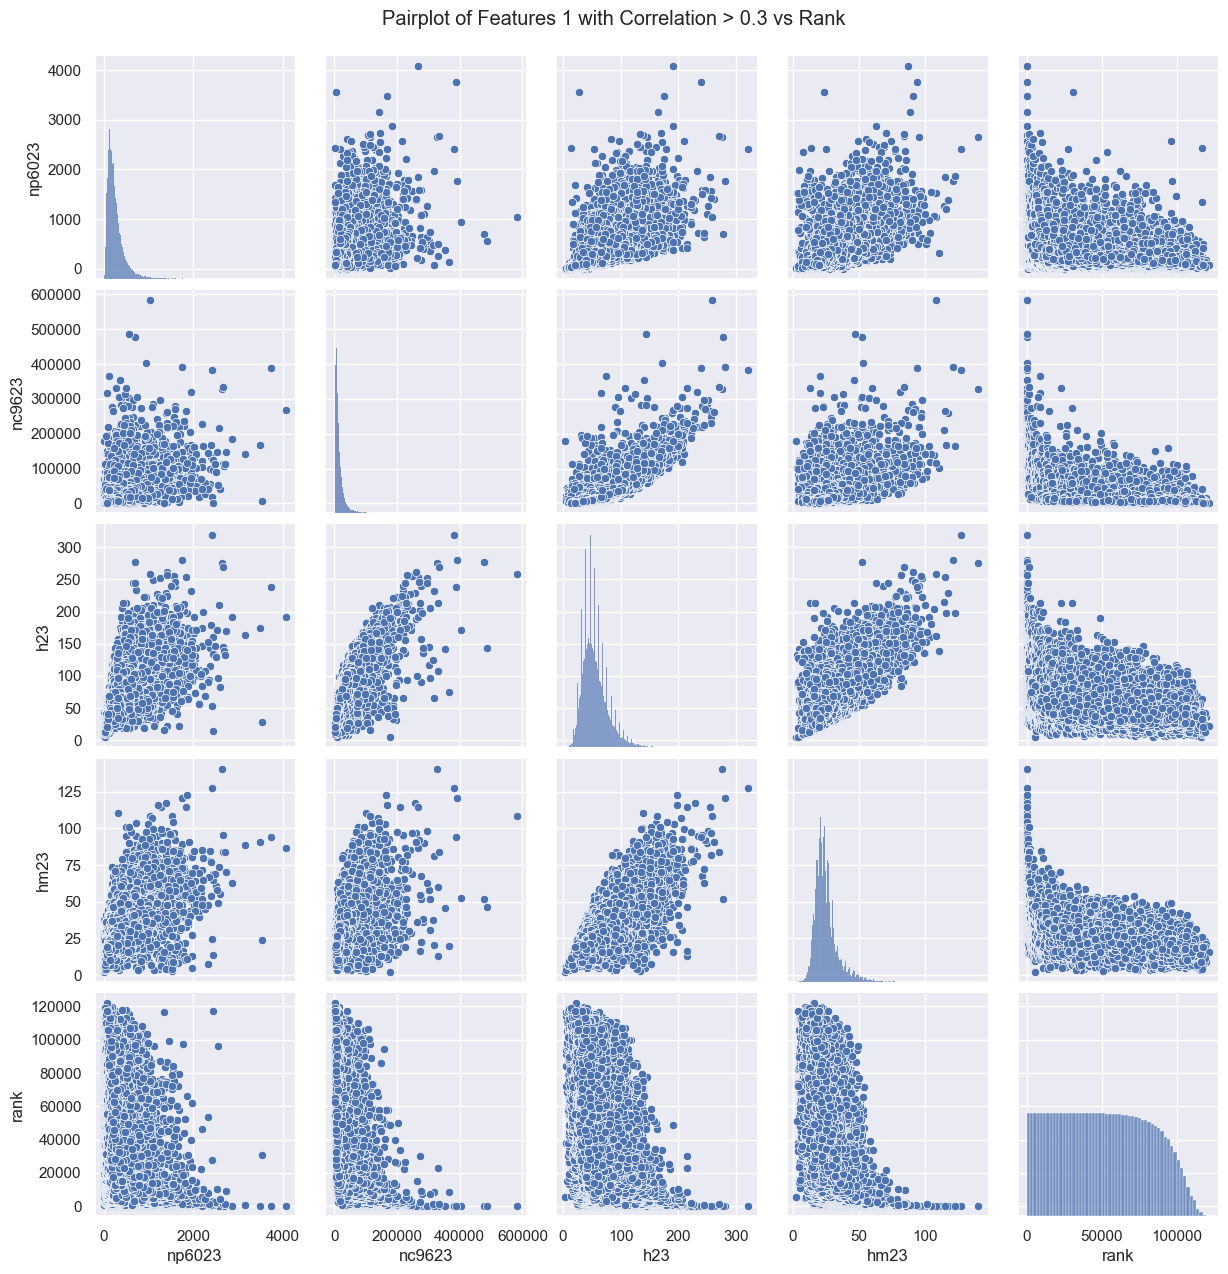

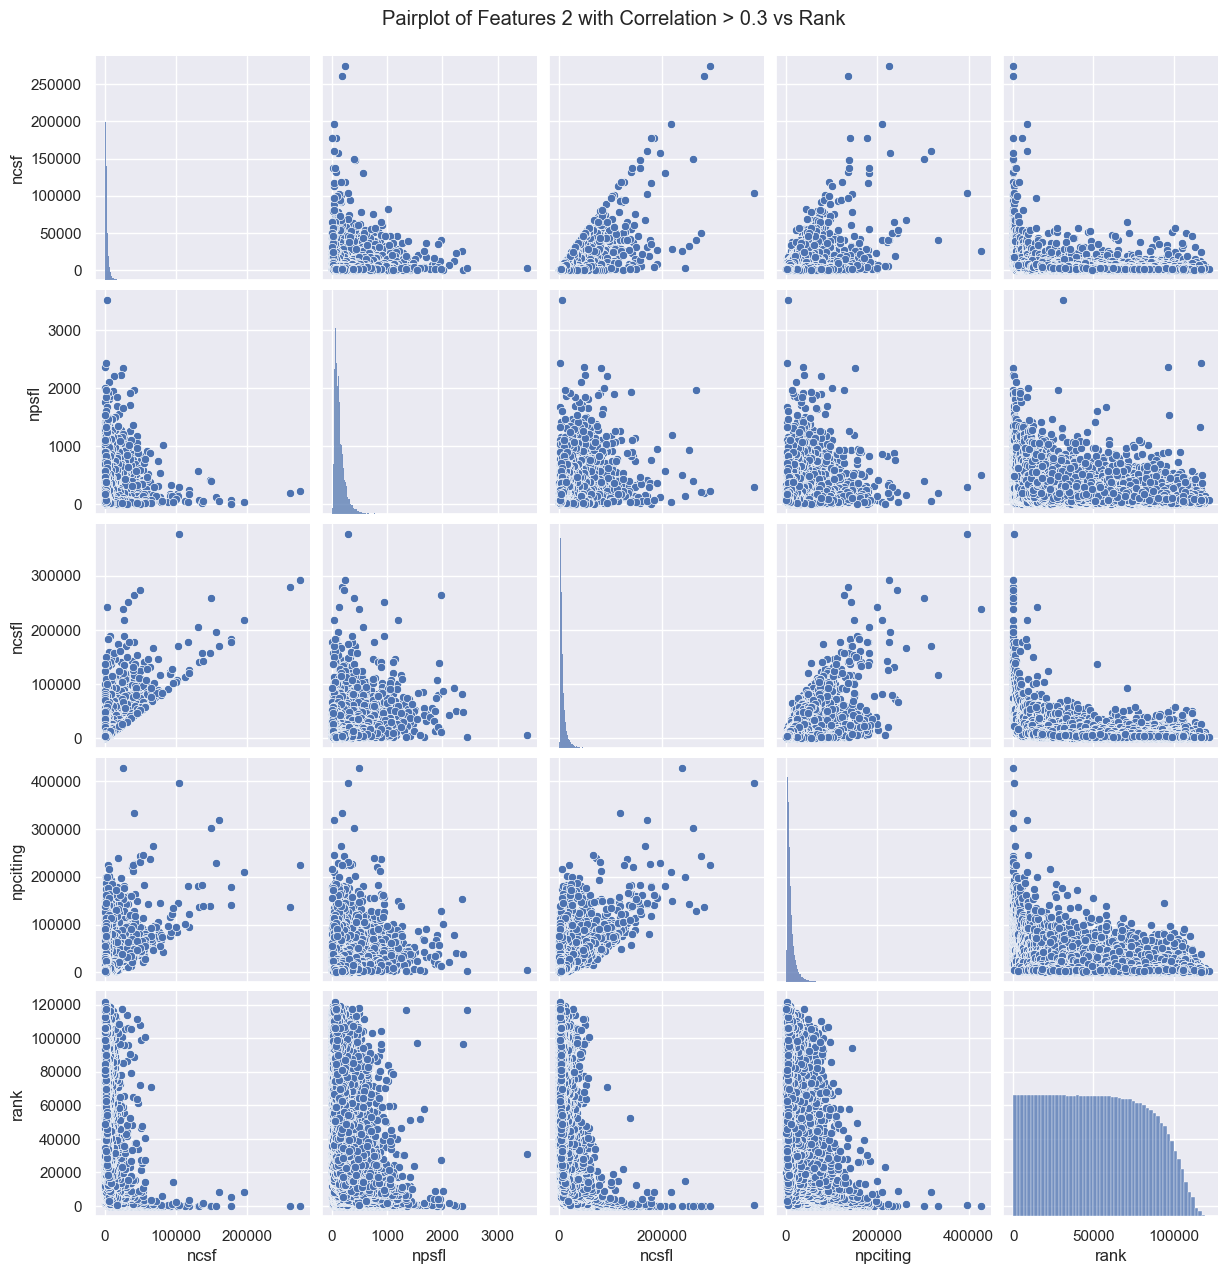

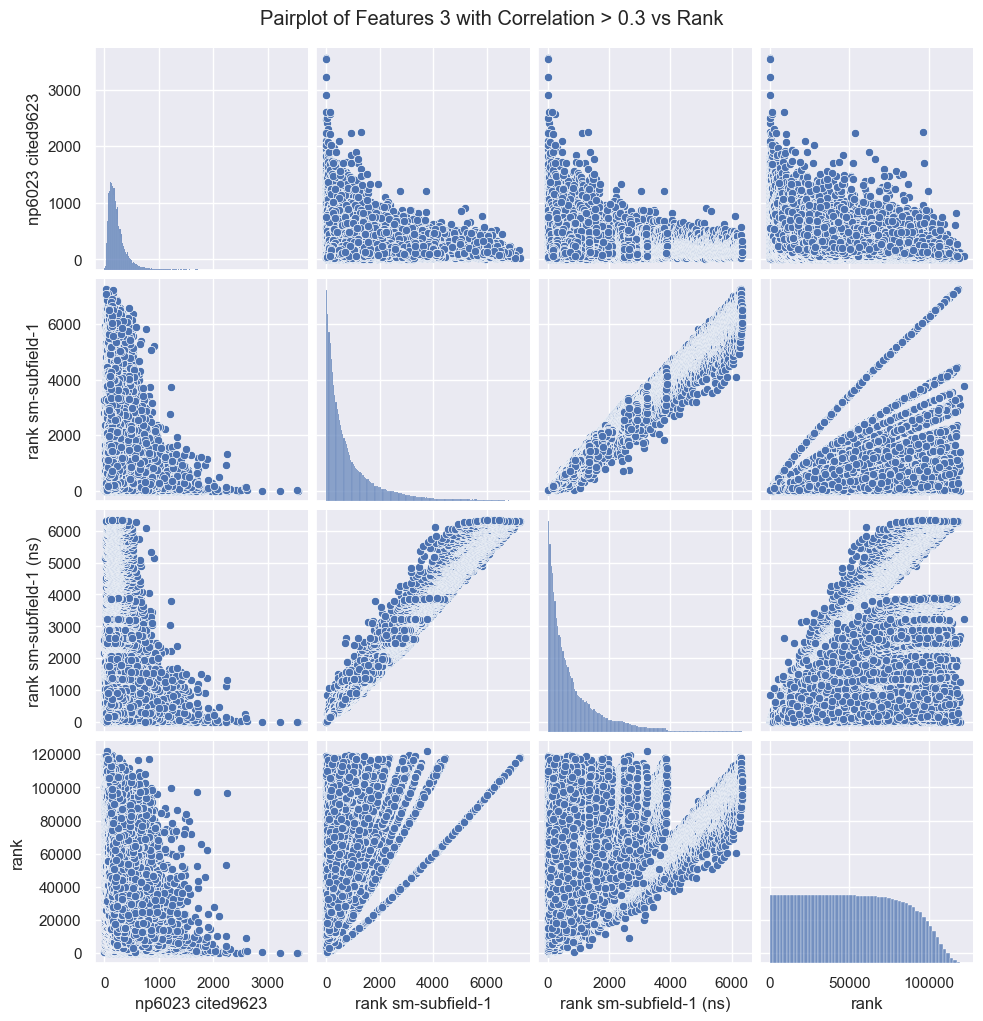

In [78]:
# Splitting the features into smaller groups for better visualization
import math

# Define the number of features per plot
features_per_plot = 4
selected_features = rank_correlations[rank_correlations.abs() > 0.3].index.tolist()
selected_features.remove('rank')

# Calculate number of subplots needed
num_subplots = math.ceil(len(selected_features) / features_per_plot)

for i in range(num_subplots):
    # Select features for the current subplot
    subset_features = selected_features[i * features_per_plot:(i + 1) * features_per_plot]
    
    # Plot the pairplot for the current subset of features along with 'rank'
    sb.pairplot(sci100k_numeric, vars=subset_features + ['rank'], kind='scatter')
    plt.suptitle(f'Pairplot of Features {i + 1} with Correlation > 0.3 vs Rank', y=1.02)
    plt.show()


In [ ]:
# Create boxplots for each feature against Rank_Category
for feature in features:
    plt.figure(figsize=(12, 6))
    sb.boxplot(x='rank', y=feature, data=sci100k_numeric)
    plt.title(f"Boxplot of {feature} by Rank Category")
    plt.xlabel('Rank Category')
    plt.ylabel(feature)
    plt.show()

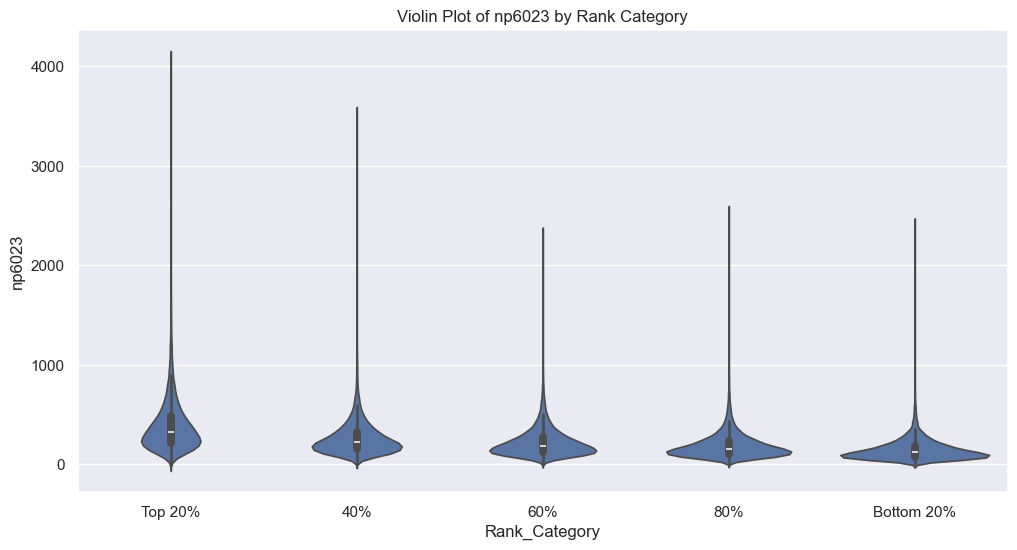

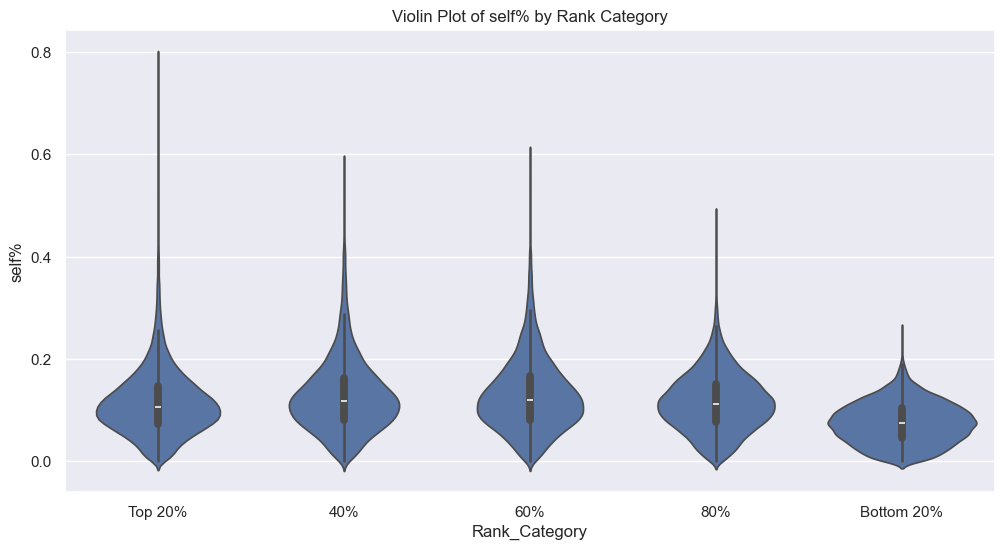

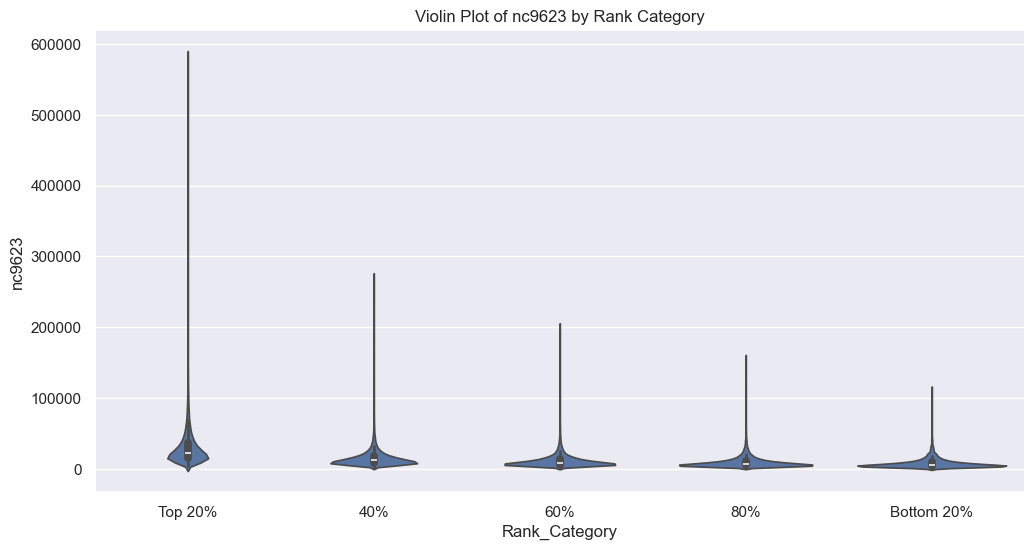

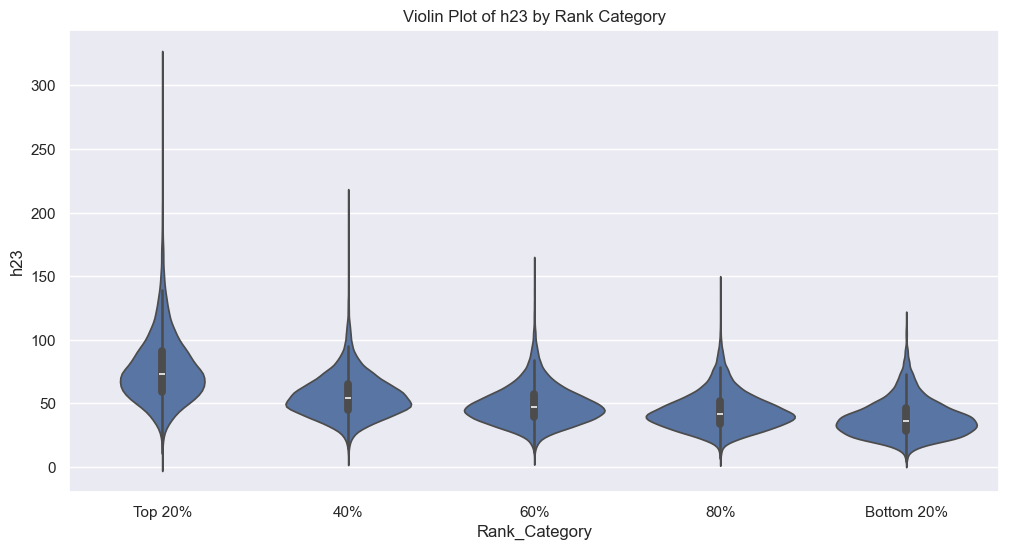

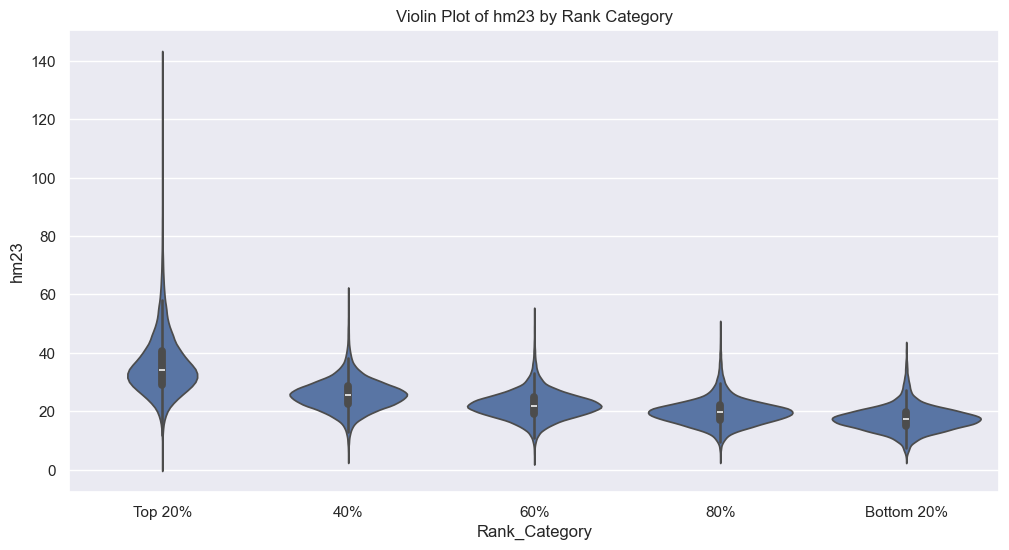

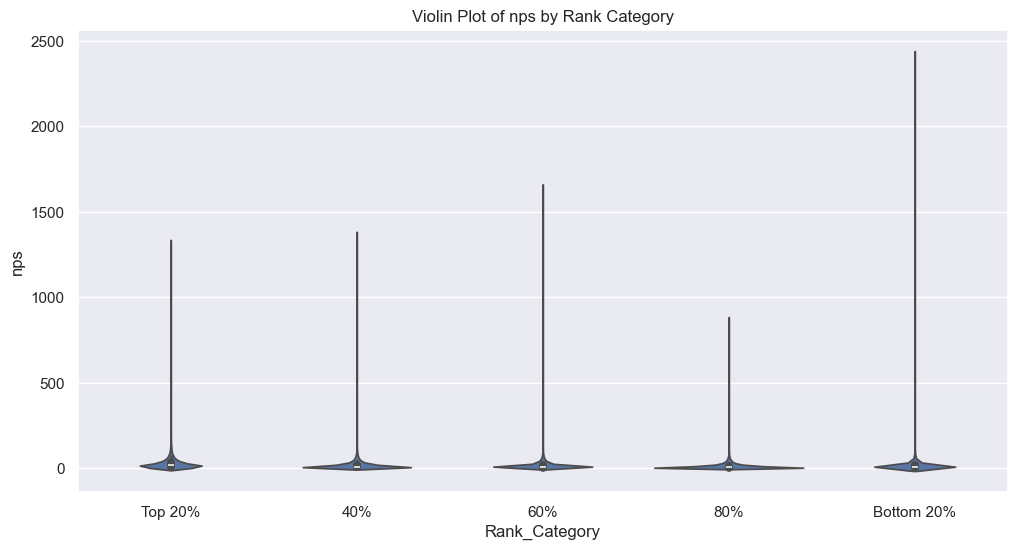

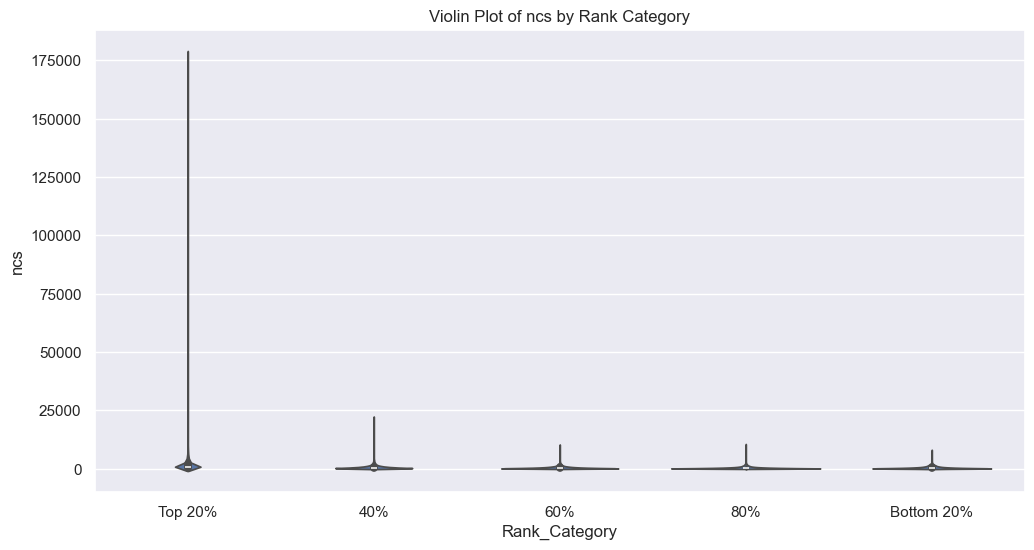

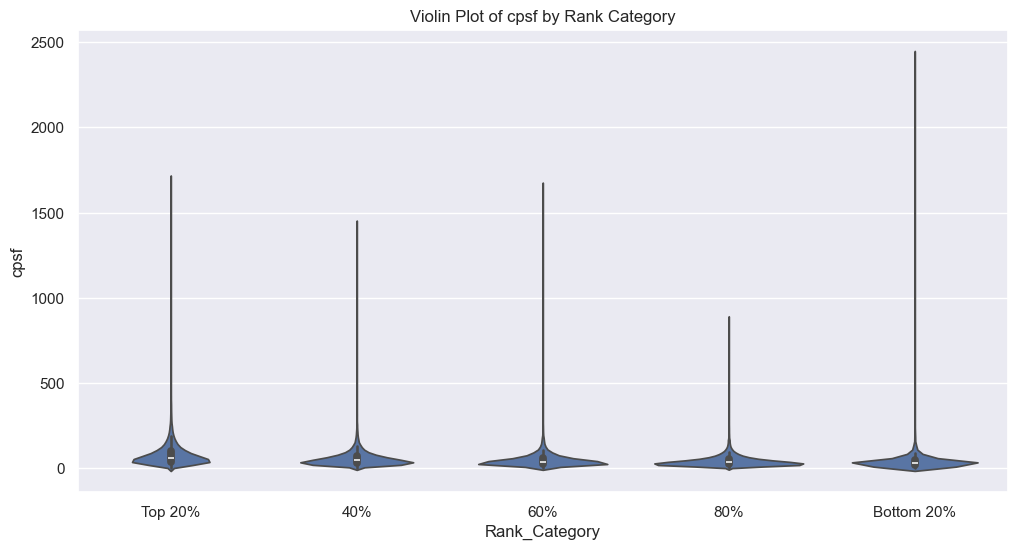

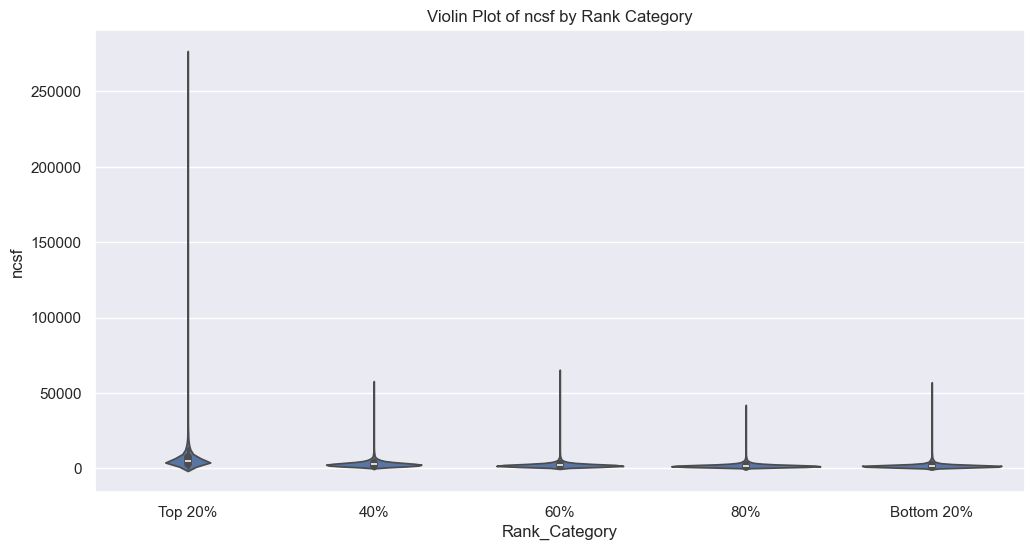

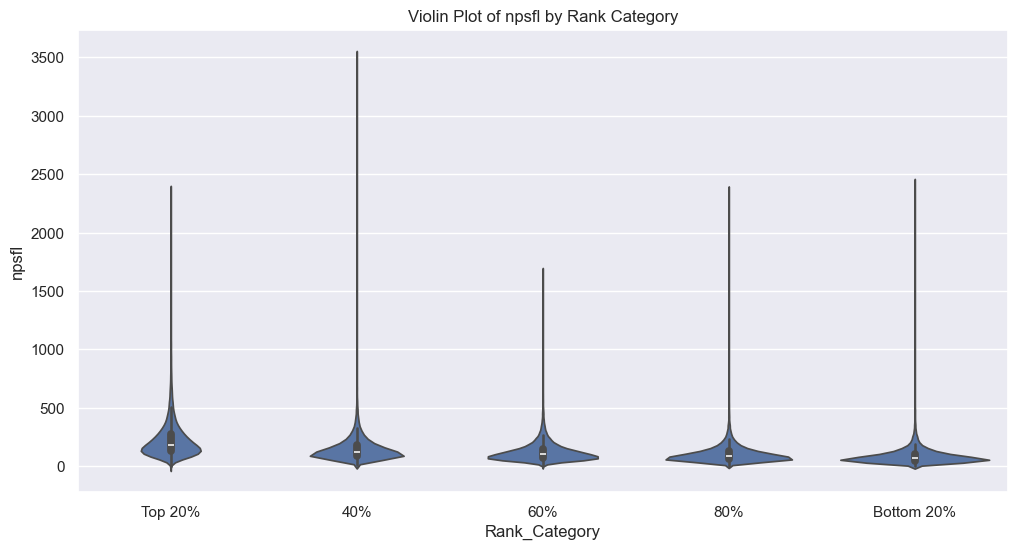

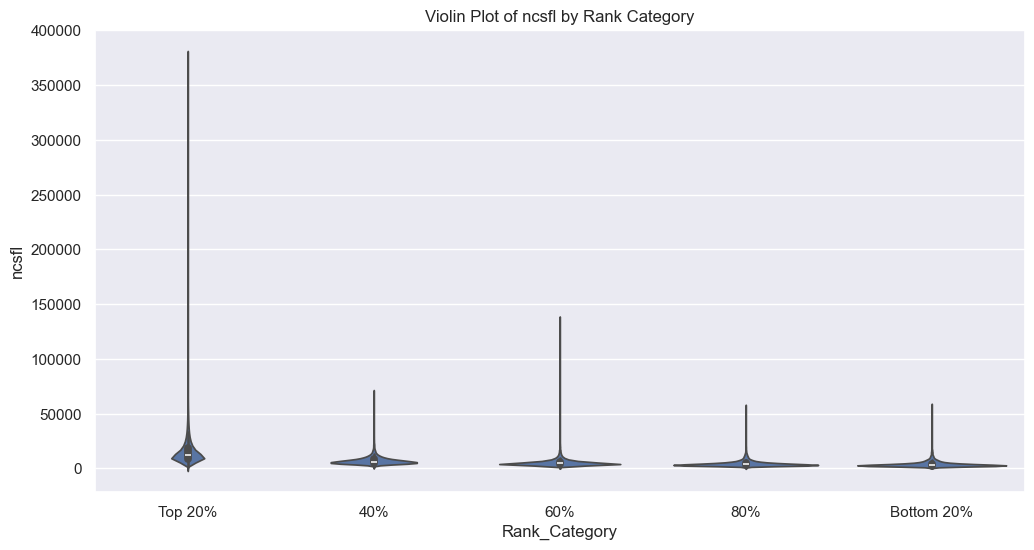

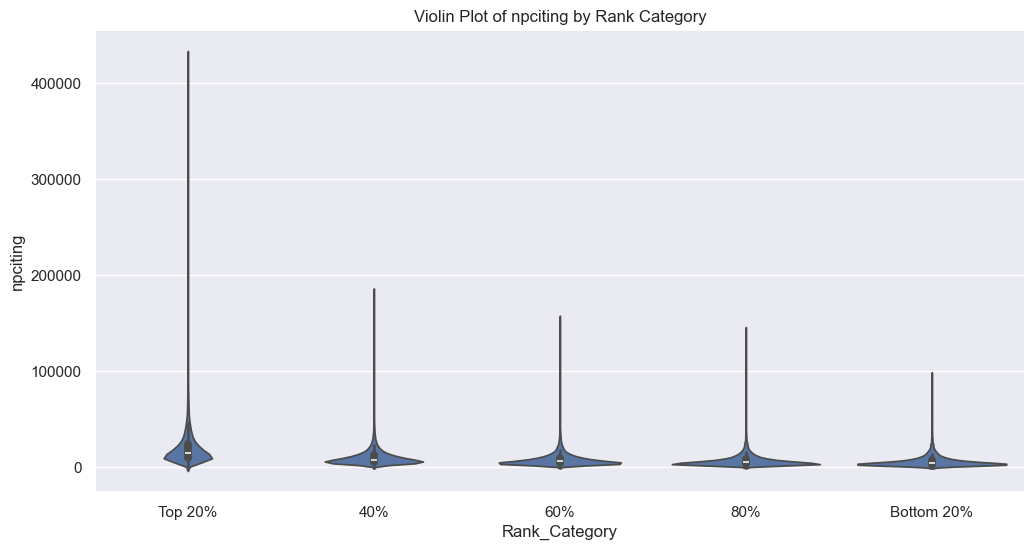

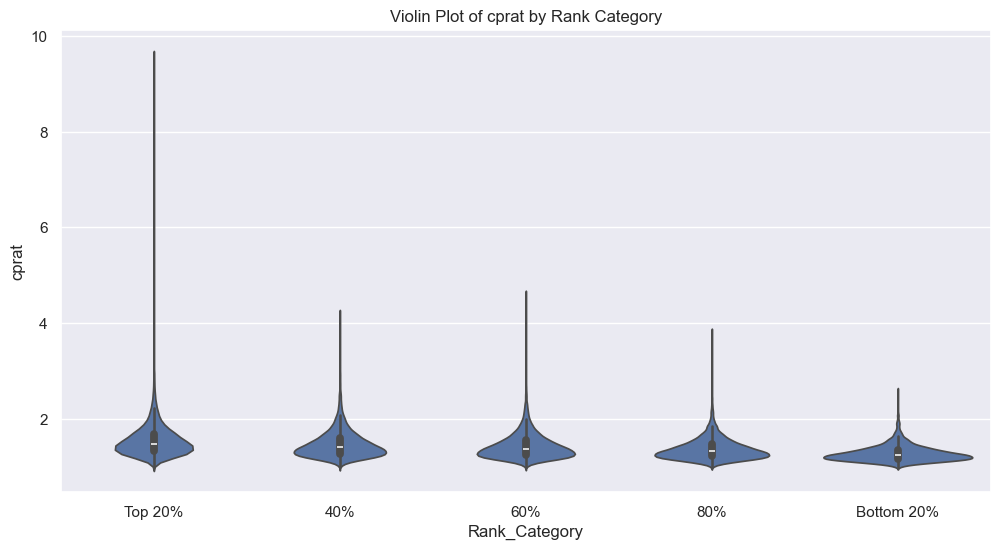

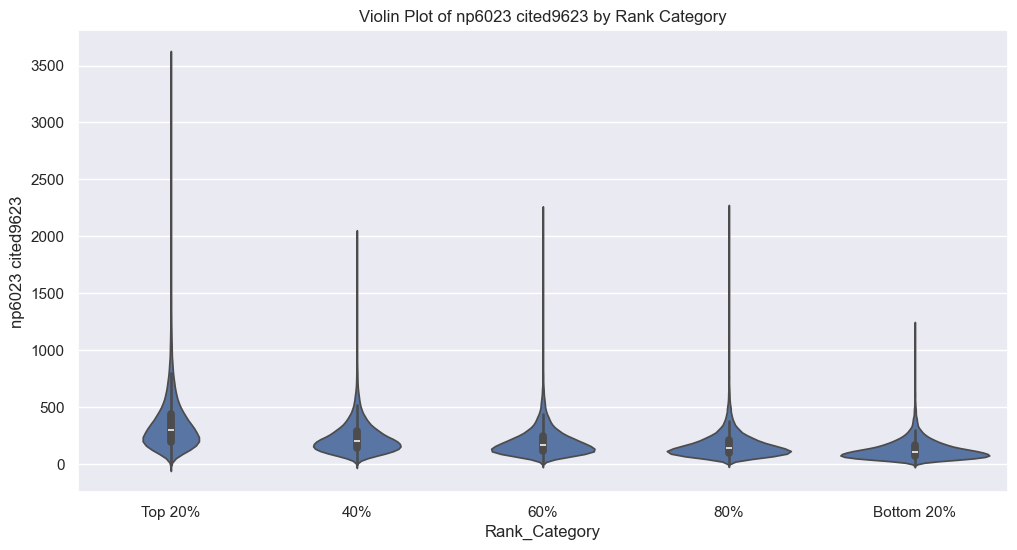

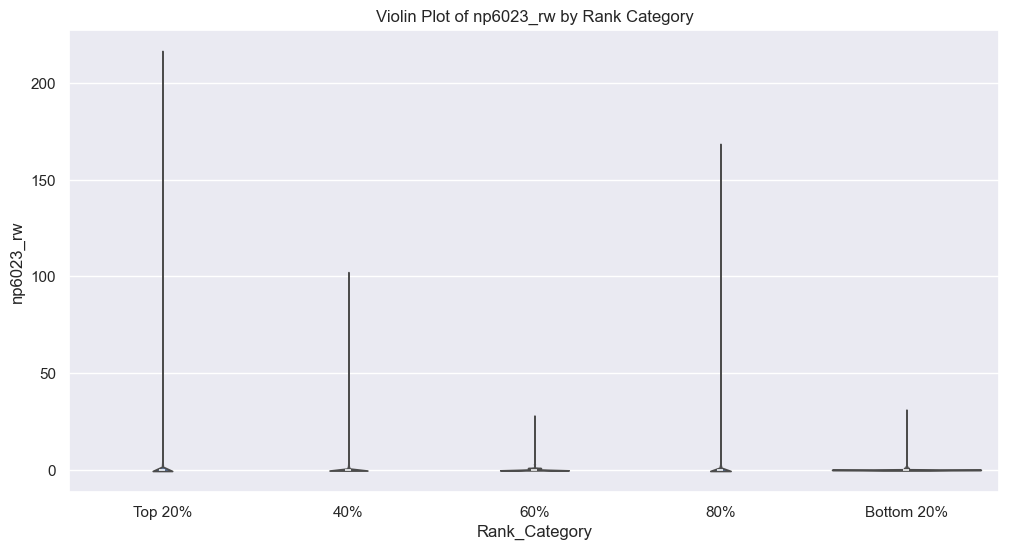

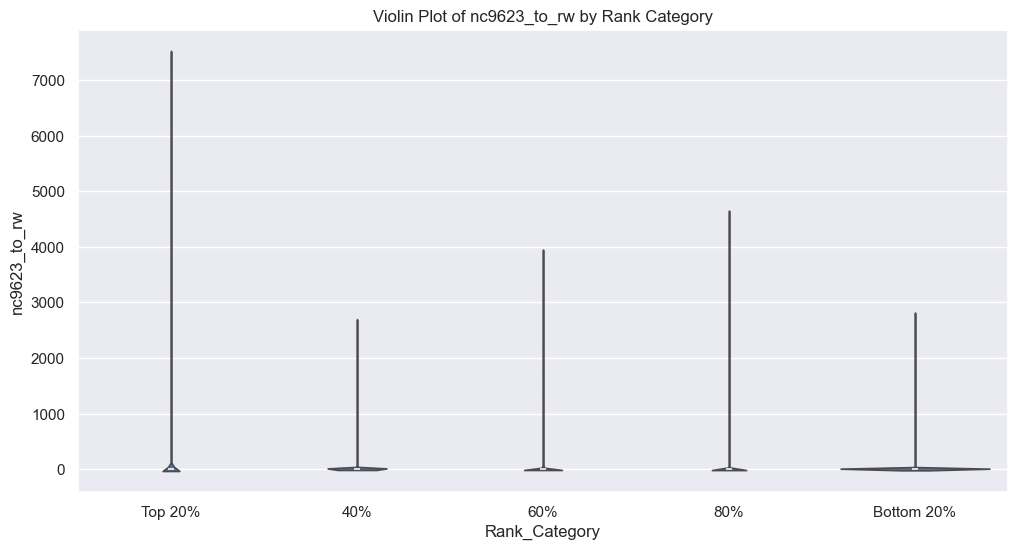

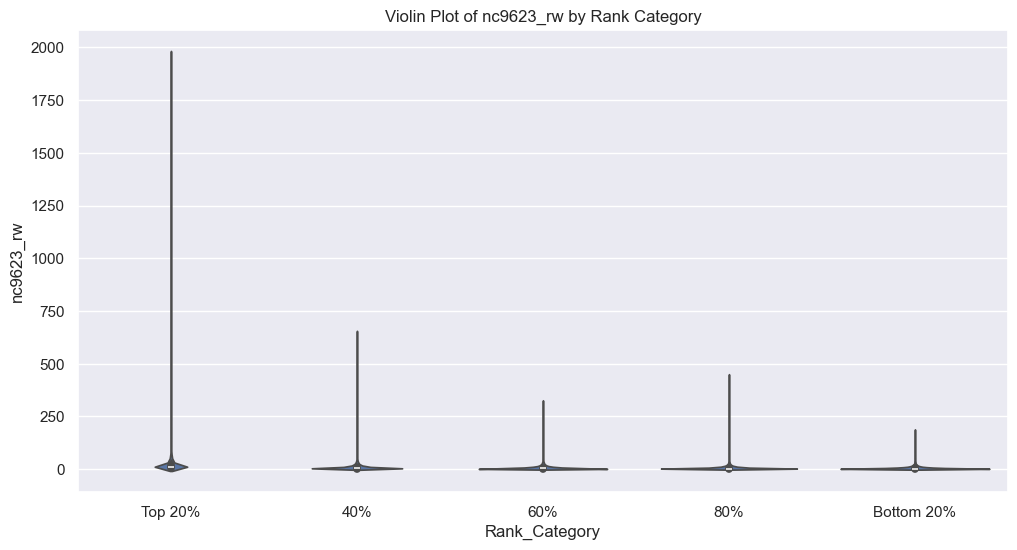

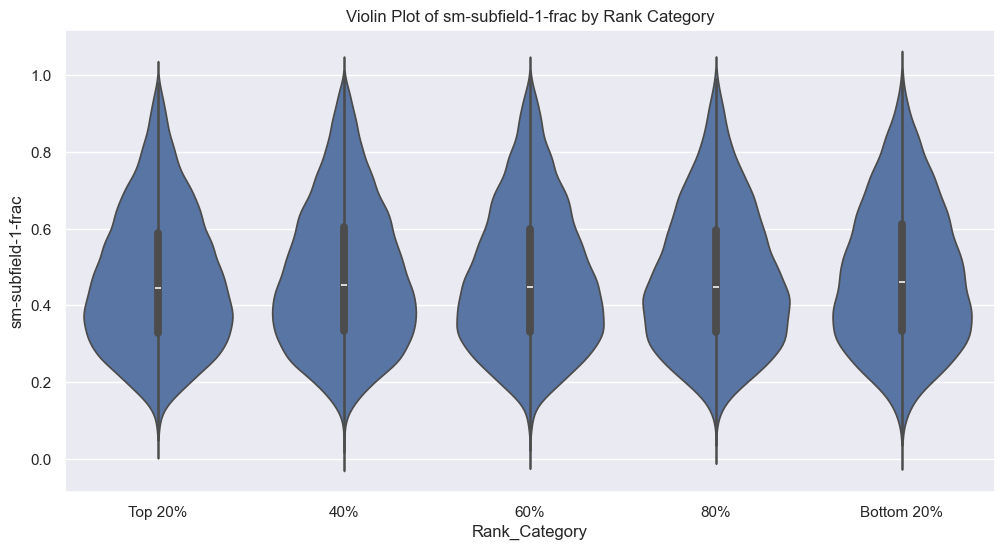

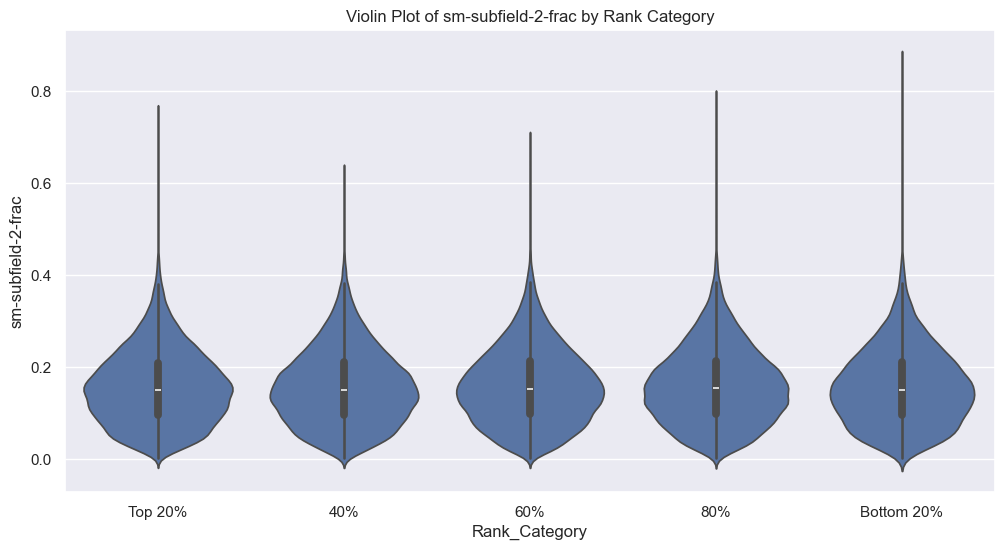

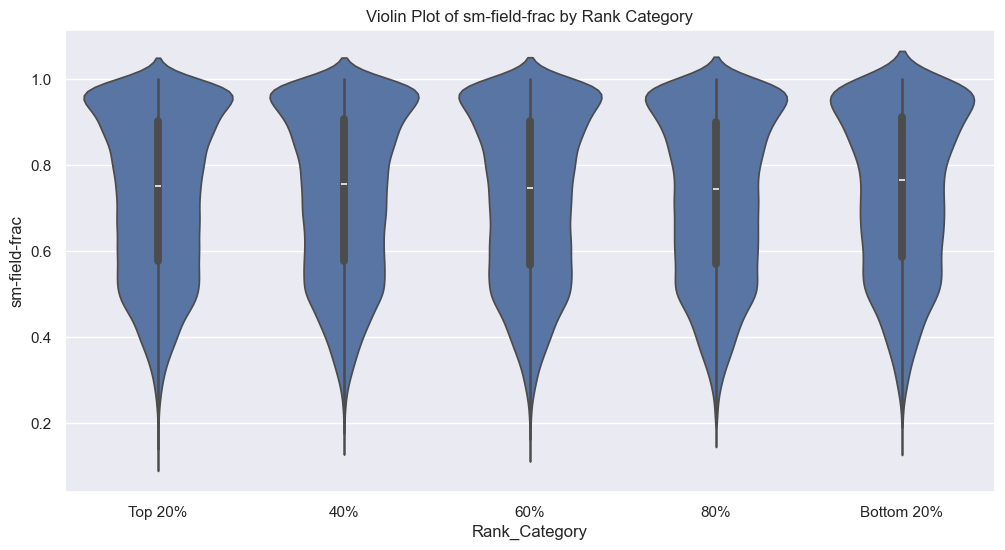

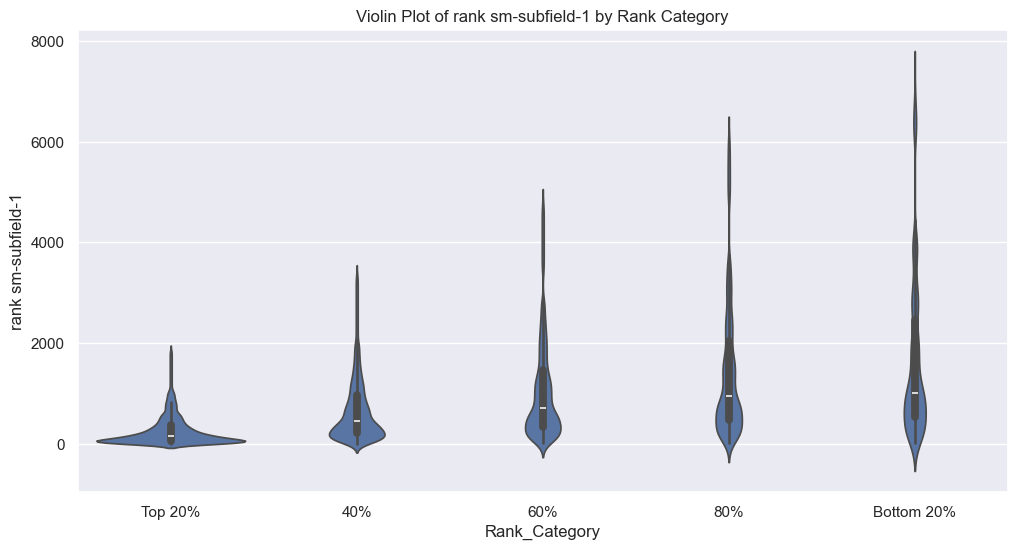

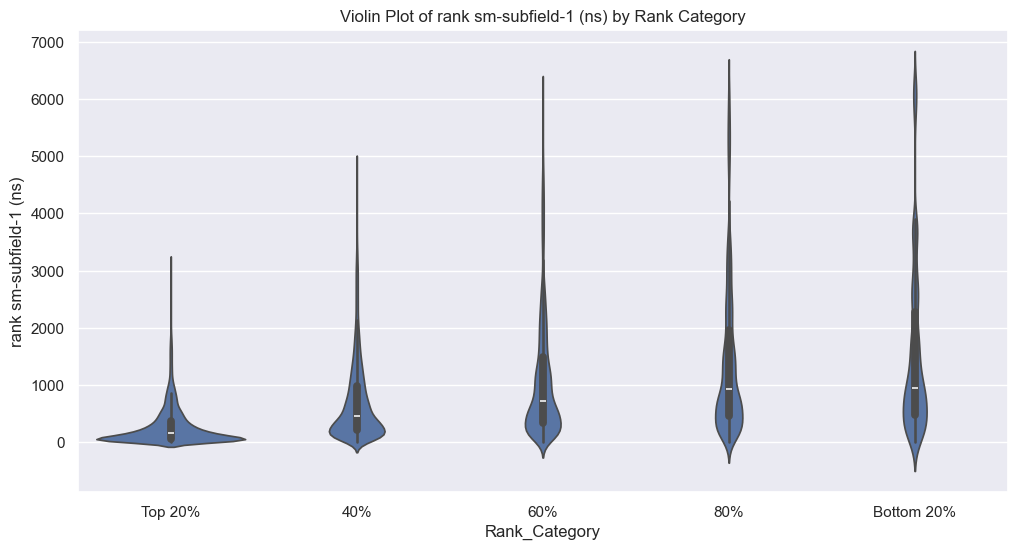

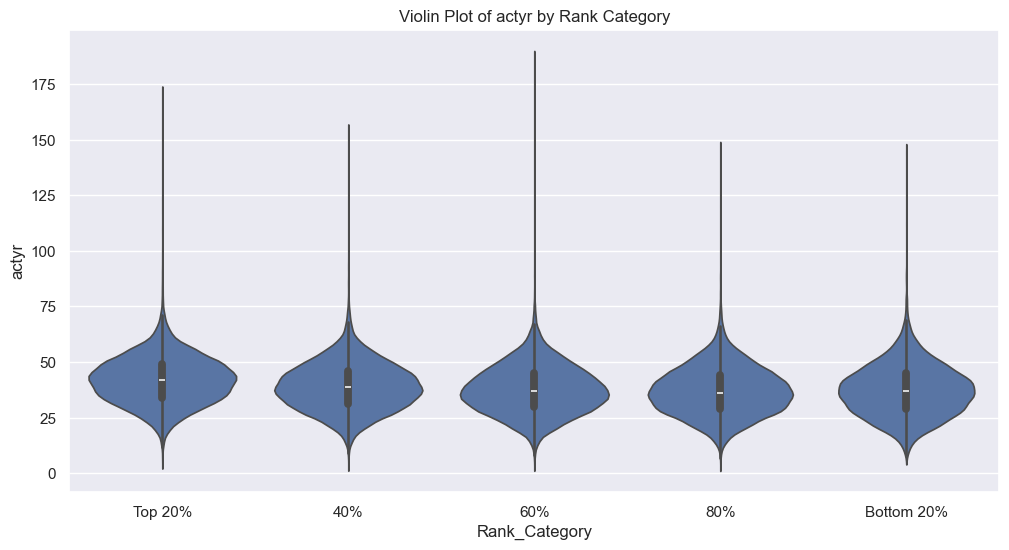

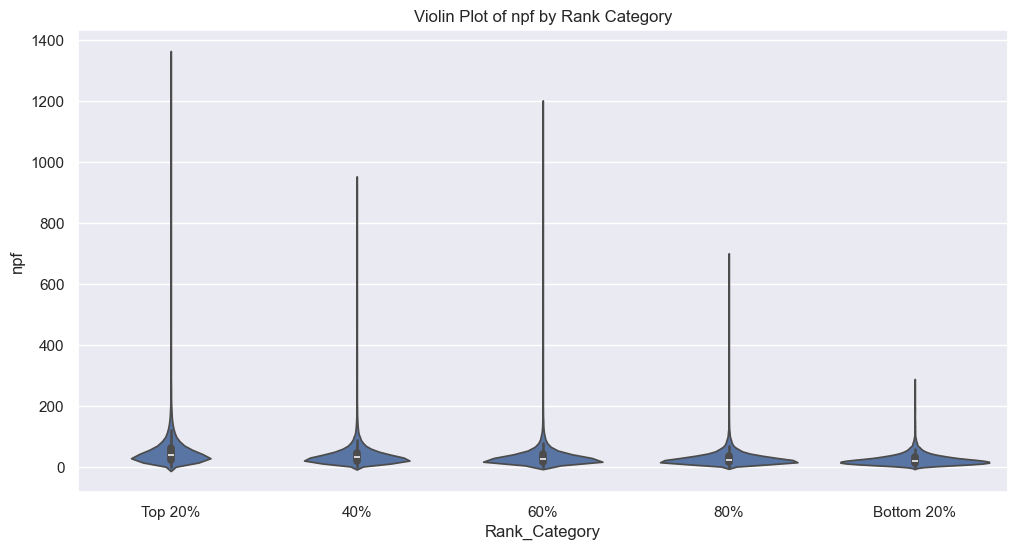

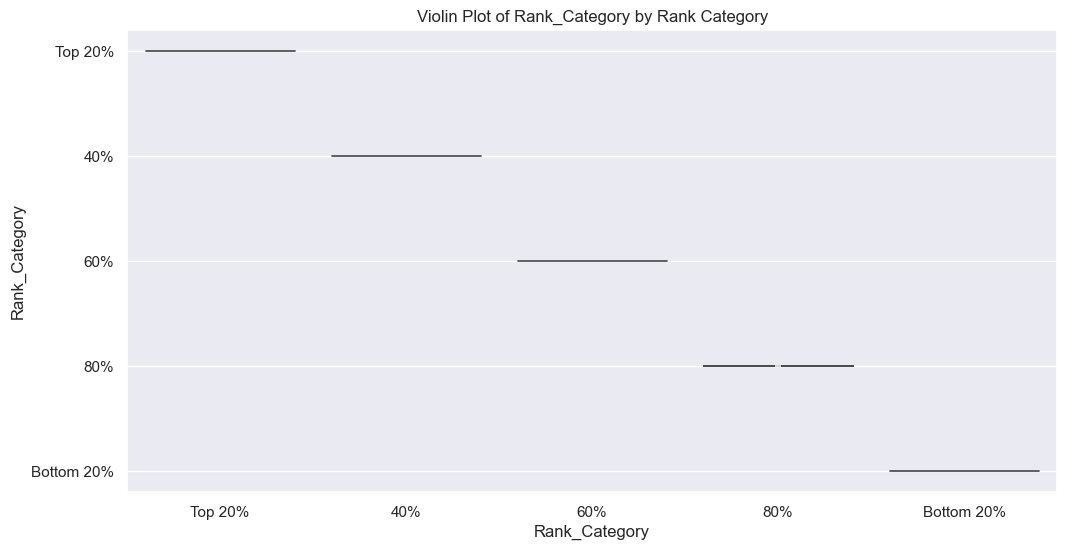

In [94]:
# Violin plot to check the spread of different features across Rank categories
for feature in features:
    plt.figure(figsize=(12, 6))
    sb.violinplot(x='Rank_Category', y=feature, data=sci100k_numeric)
    plt.title(f"Violin Plot of {feature} by Rank Category")
    plt.show()


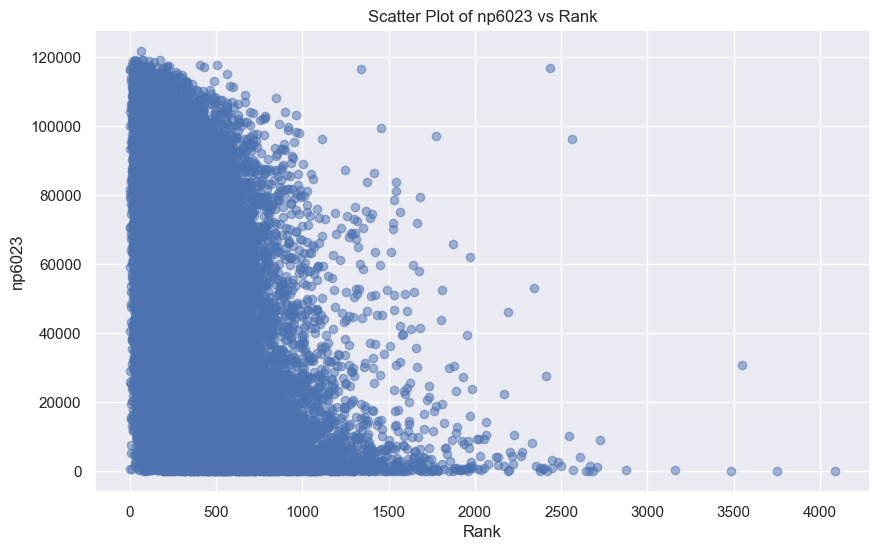

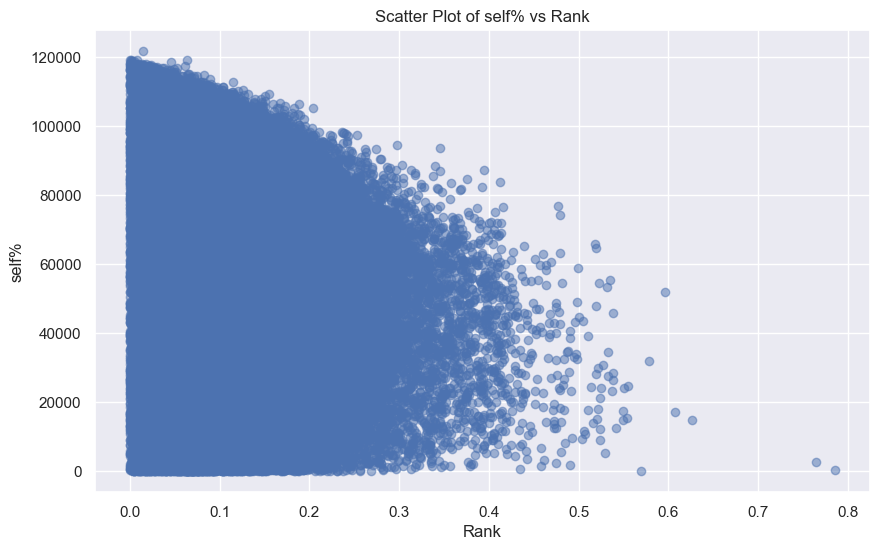

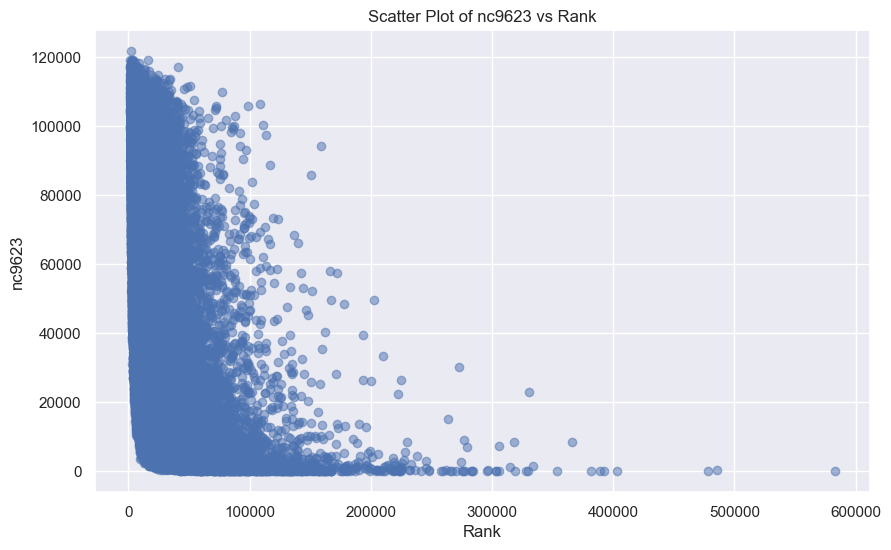

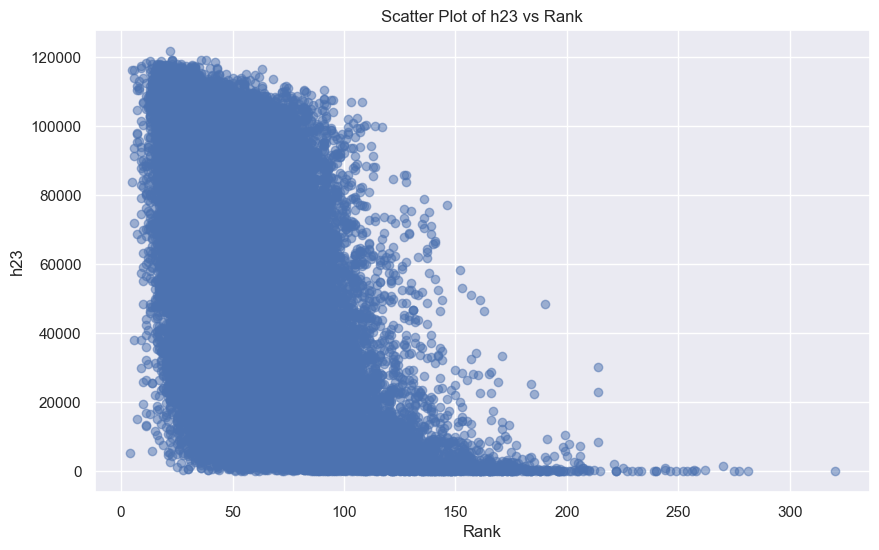

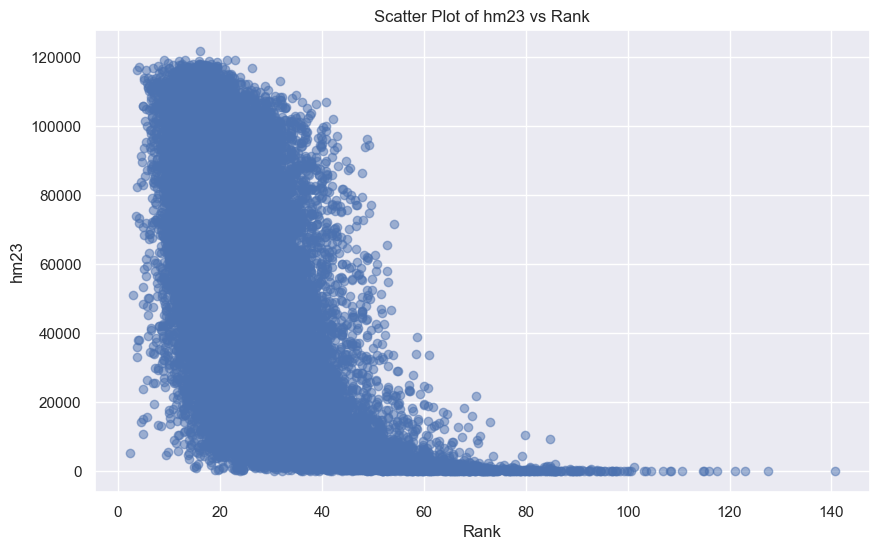

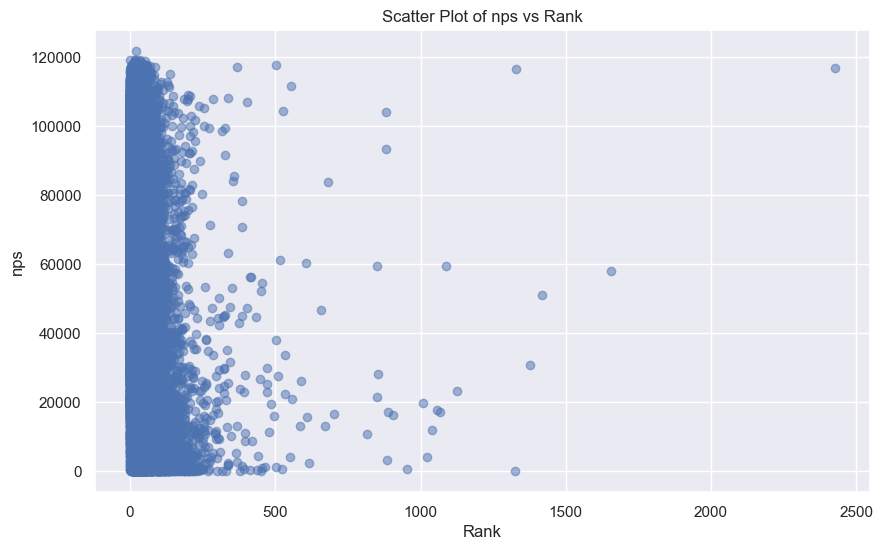

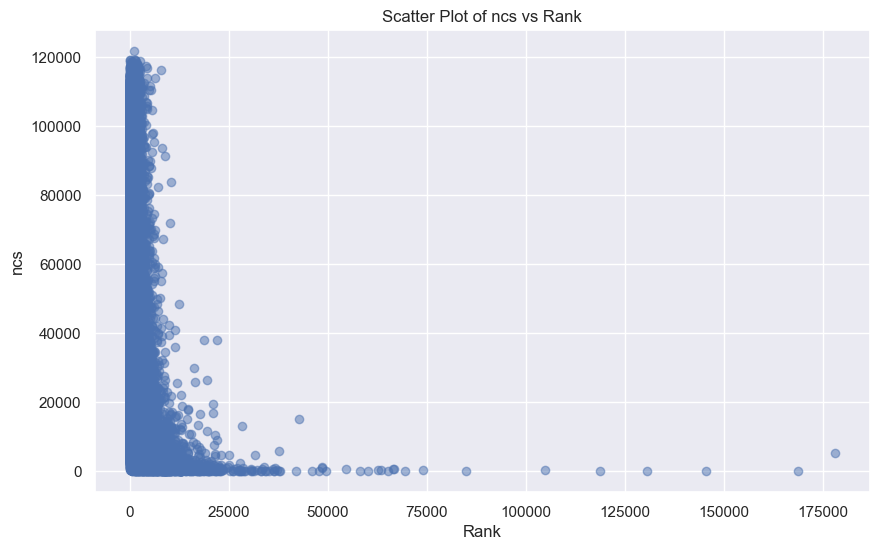

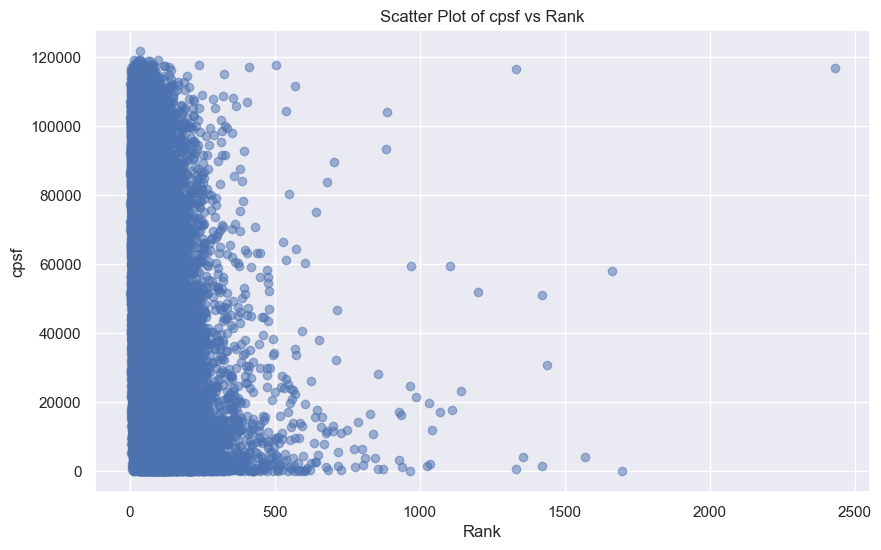

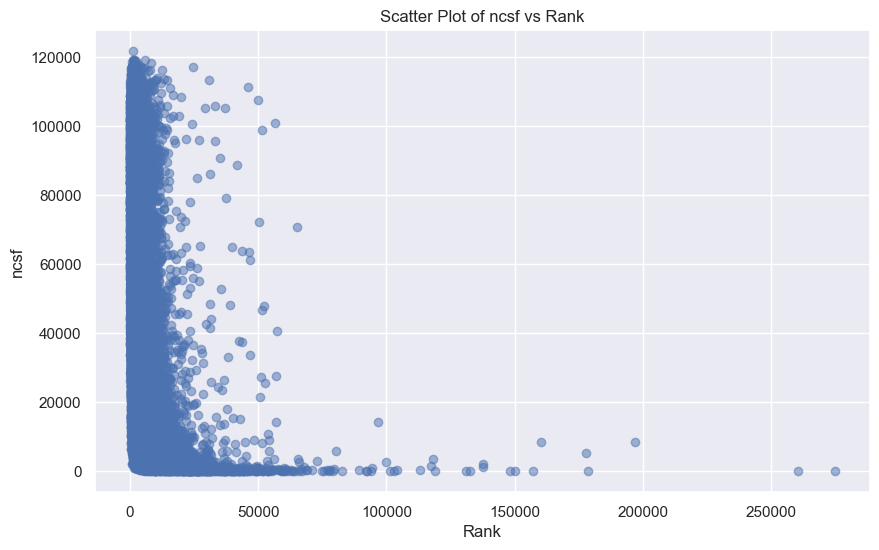

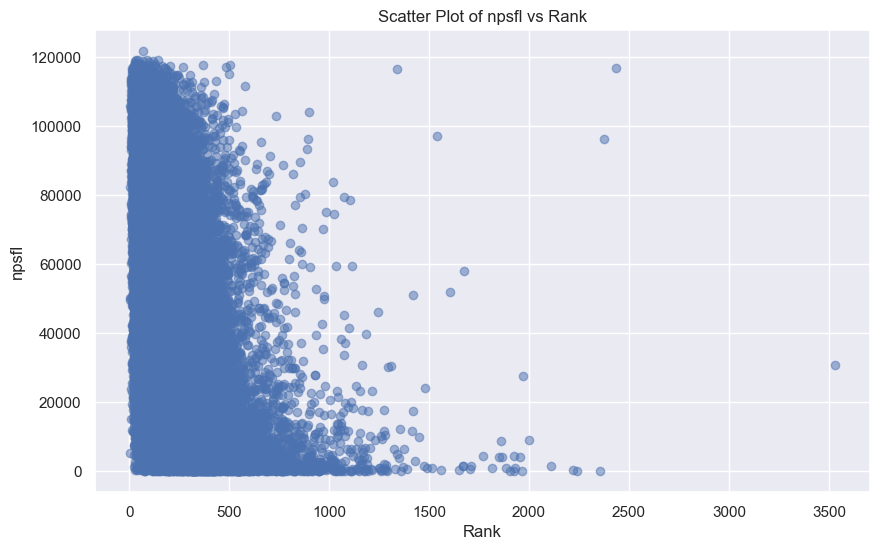

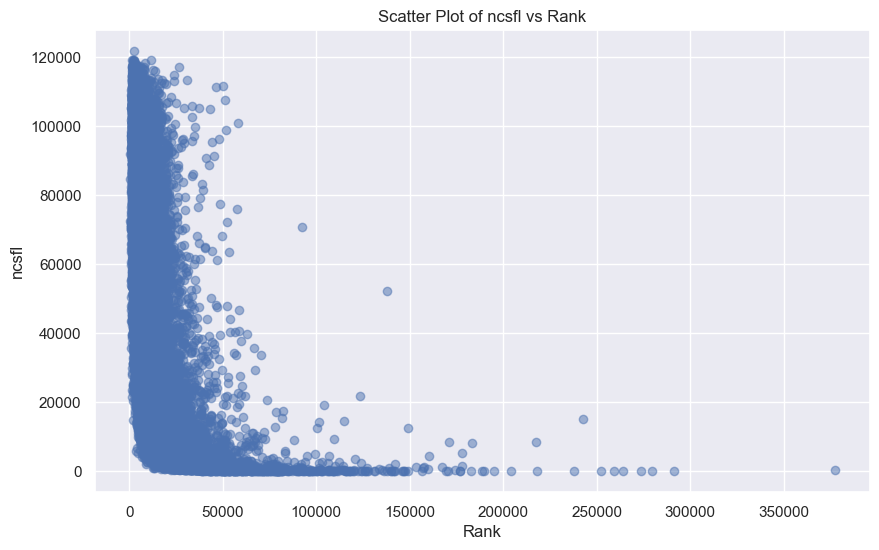

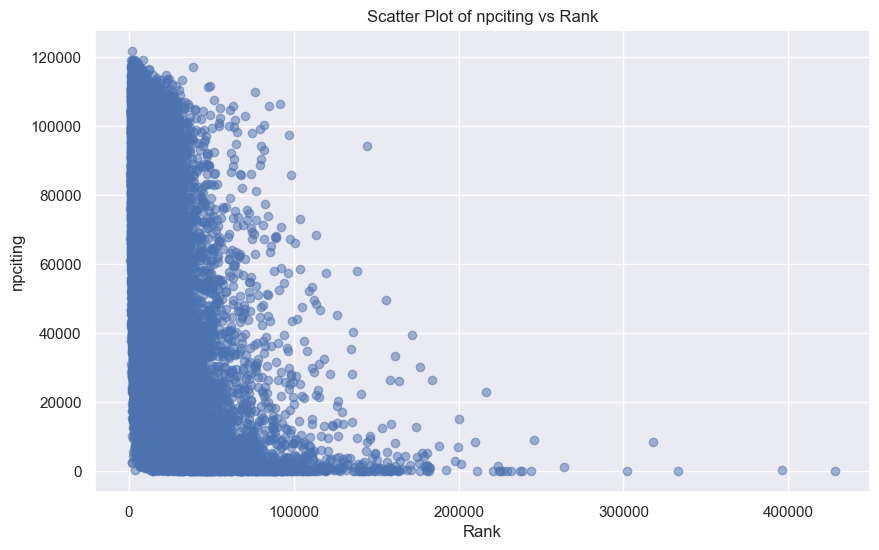

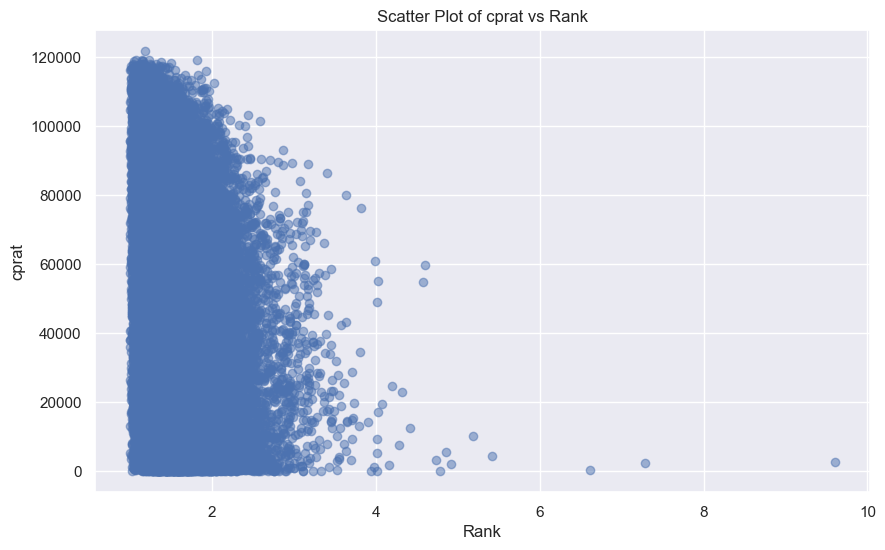

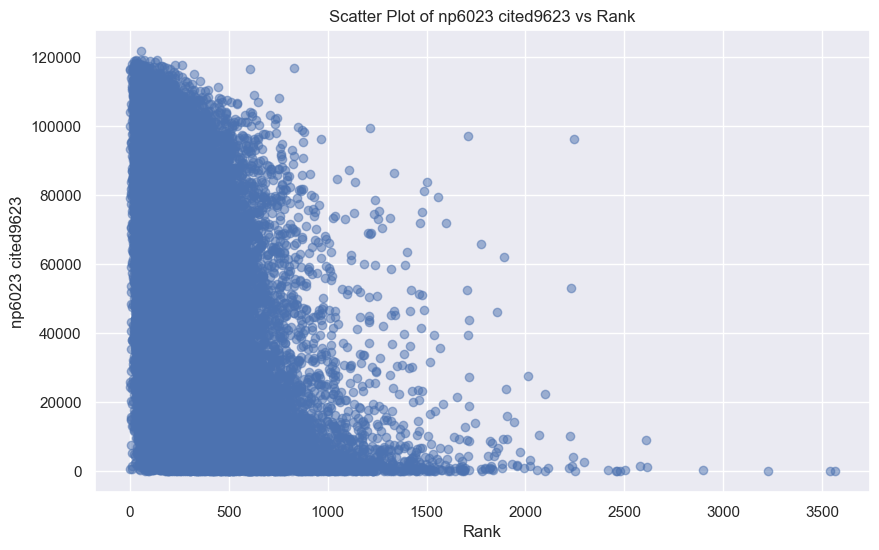

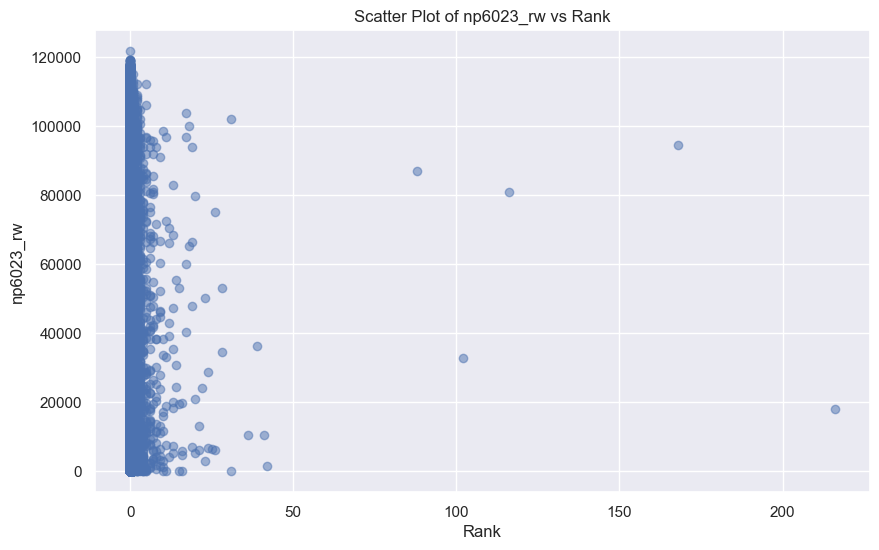

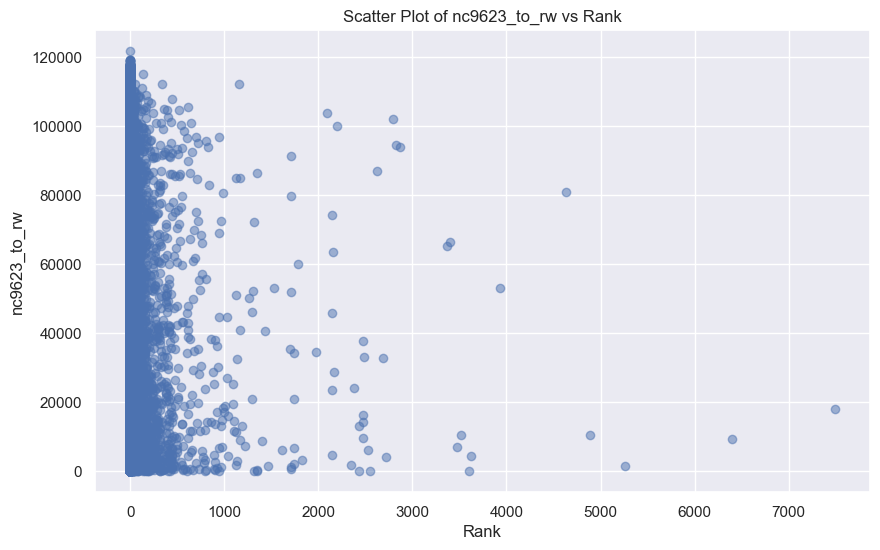

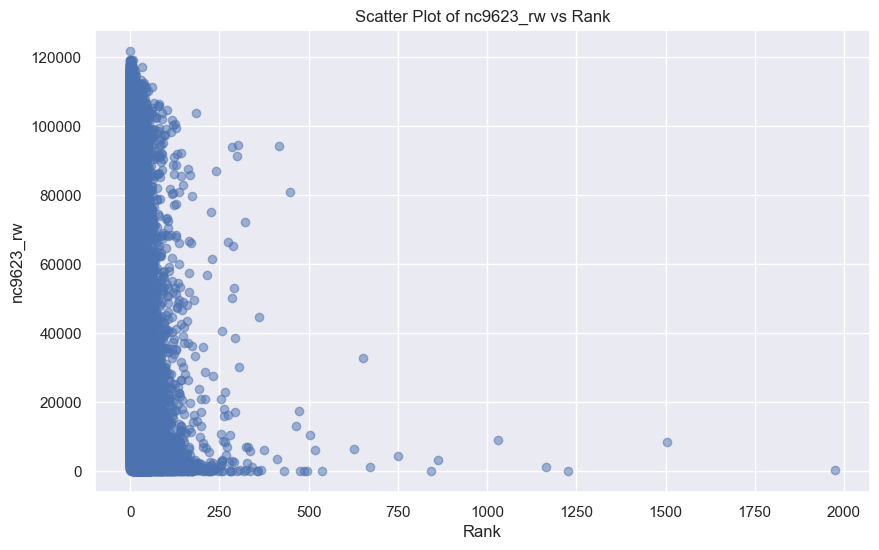

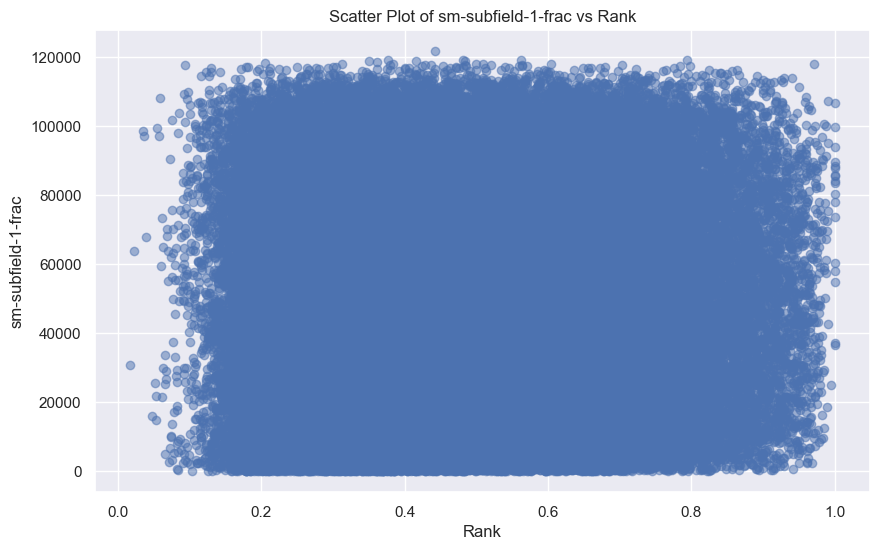

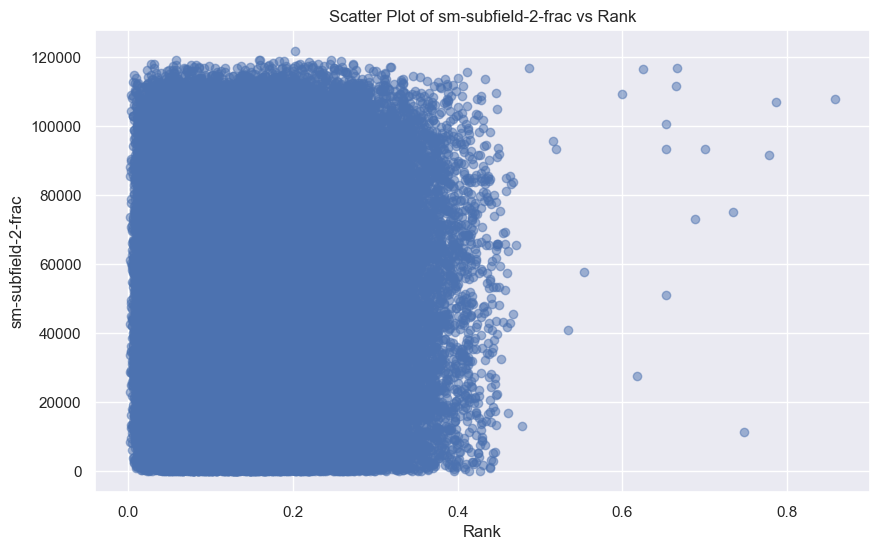

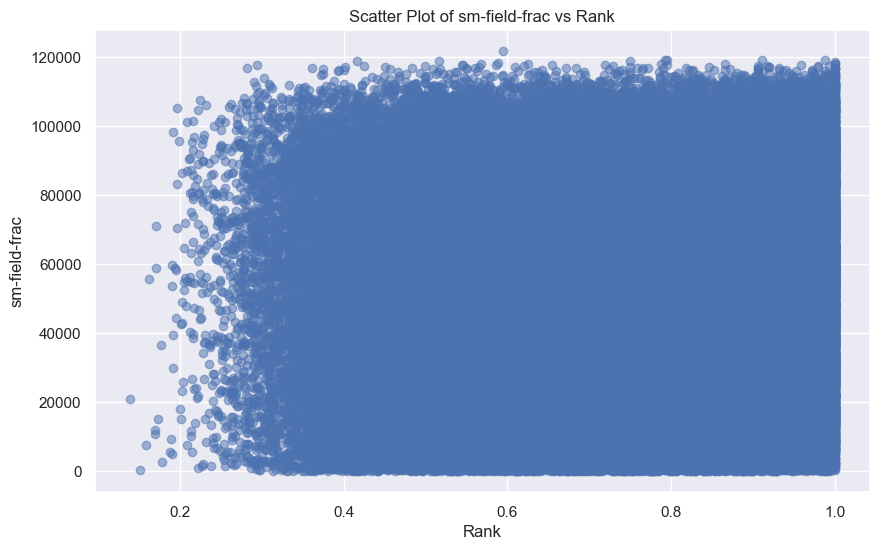

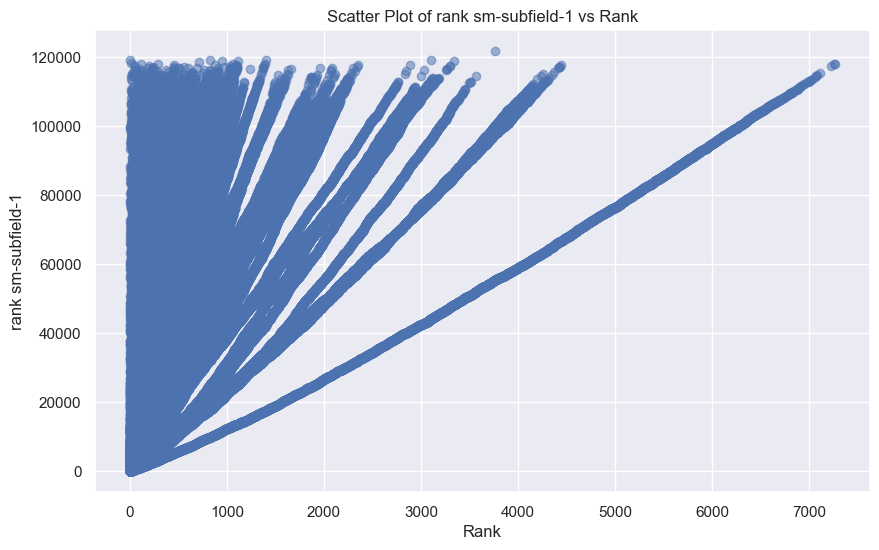

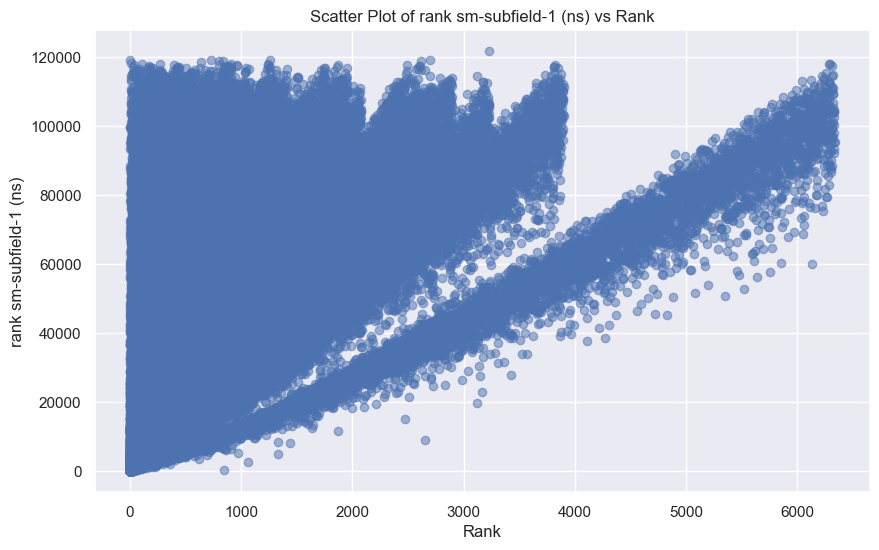

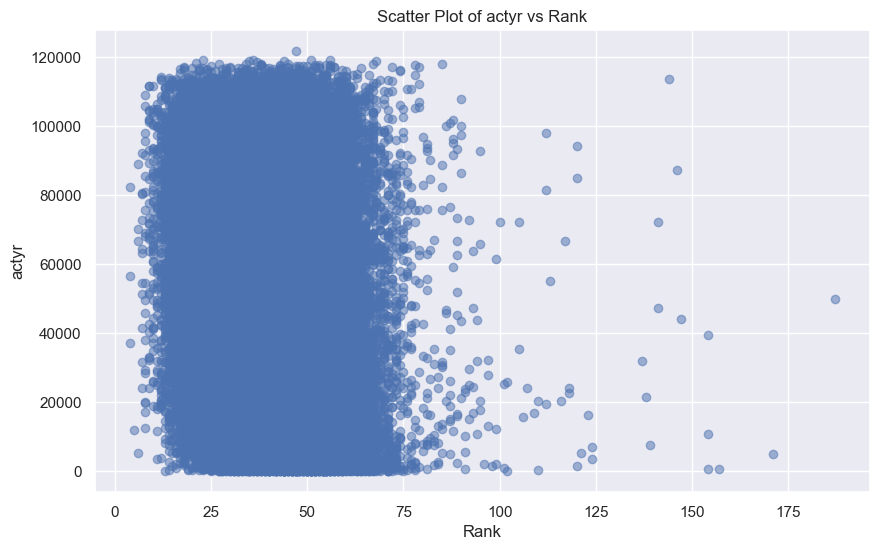

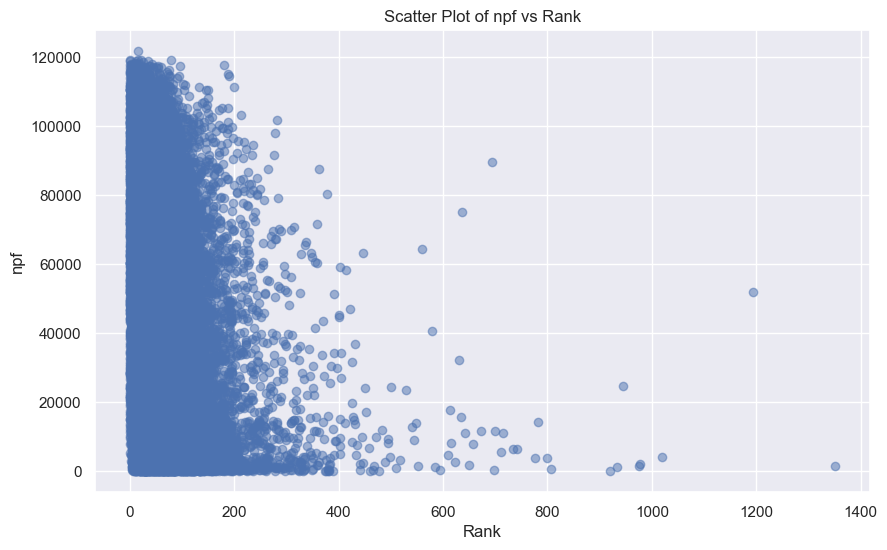

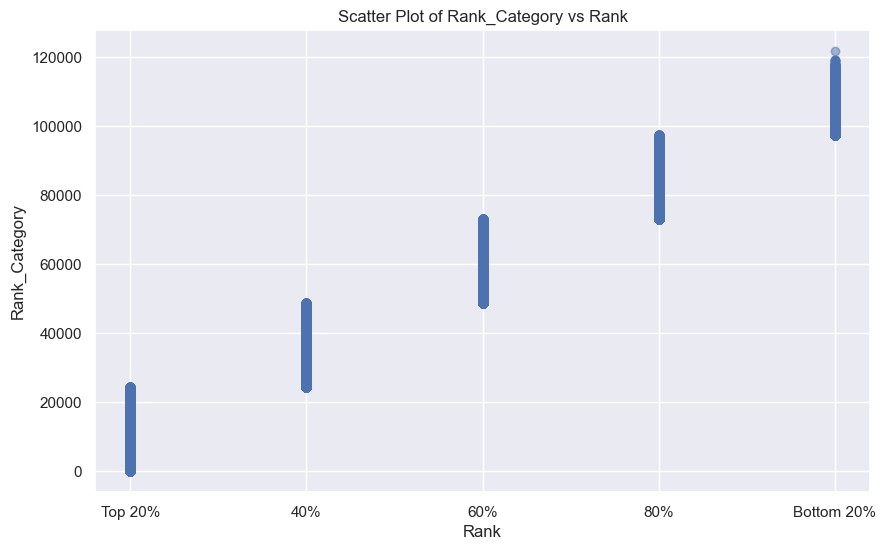

In [113]:
# Scatter plot for each feature vs 'Rank' to see the spread
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(sci100k_numeric[feature], sci100k_numeric['rank'], alpha=0.5)
    plt.xlabel('Rank')
    plt.ylabel(feature)
    plt.title(f'Scatter Plot of {feature} vs Rank')
    plt.show()


In [104]:
# Standard Deviation of features to understand variability
feature_std = sci100k_numeric[selected_features].std()
print("Standard Deviation of Selected Features:\n", feature_std)

Standard Deviation of Selected Features:
 np6023                       201.615130
nc9623                     18564.756761
h23                           23.042912
hm23                           9.205298
ncsf                        4376.280234
npsfl                        120.202101
ncsfl                       9139.389445
npciting                   12895.162210
np6023 cited9623             177.570711
rank sm-subfield-1          1070.234439
rank sm-subfield-1 (ns)     1055.596313
dtype: float64


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [118]:

# Splitting data into training and testing sets
X = sci100k_numeric[selected_features]
y = sci100k_numeric['rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [123]:
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)


In [125]:
# Evaluating Linear Regression model
print("Linear Regression Results:")
print(f"R-squared: {r2_score(y_test, y_pred_linear):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_linear):.3f}")


Linear Regression Results:
R-squared: 0.605
Mean Squared Error: 356476749.499


In [127]:
# Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [129]:
# Evaluating Ridge Regression model
print("\nRidge Regression Results:")
print(f"R-squared: {r2_score(y_test, y_pred_ridge):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge):.3f}")



Ridge Regression Results:
R-squared: 0.605
Mean Squared Error: 356476984.157


In [131]:
# Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)


In [133]:
# Evaluating Lasso Regression model
print("\nLasso Regression Results:")
print(f"R-squared: {r2_score(y_test, y_pred_lasso):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso):.3f}")


Lasso Regression Results:
R-squared: 0.605
Mean Squared Error: 356477219.490


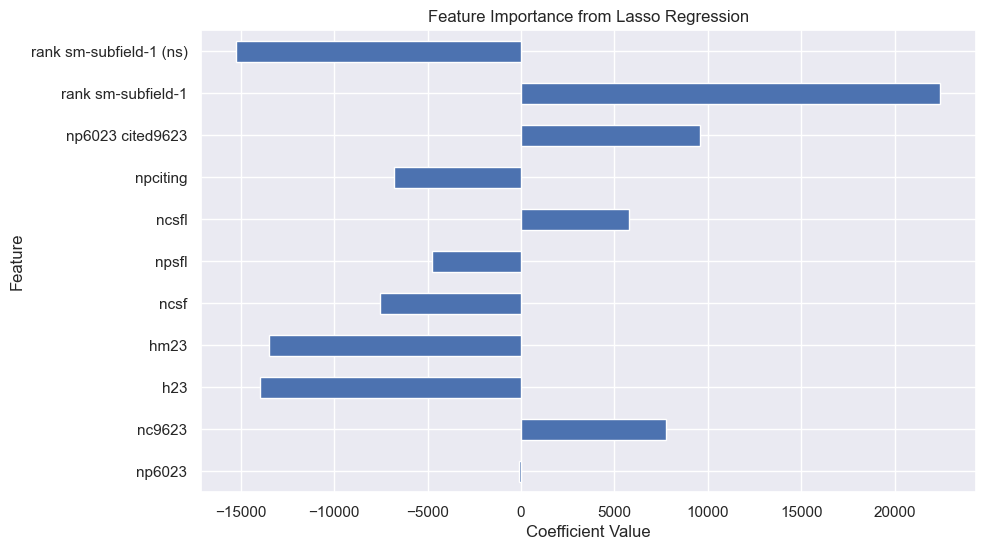

In [135]:
# Feature importance using Lasso
lasso_coefficients = pd.Series(lasso_model.coef_, index=selected_features)
plt.figure(figsize=(10, 6))
lasso_coefficients.plot(kind='barh')
plt.title('Feature Importance from Lasso Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [166]:
# Creating a composite score based on Linear Regression coefficients
composite_score = np.dot(X, linear_model.coef_)
sci100k_numeric['composite_score'] = composite_score

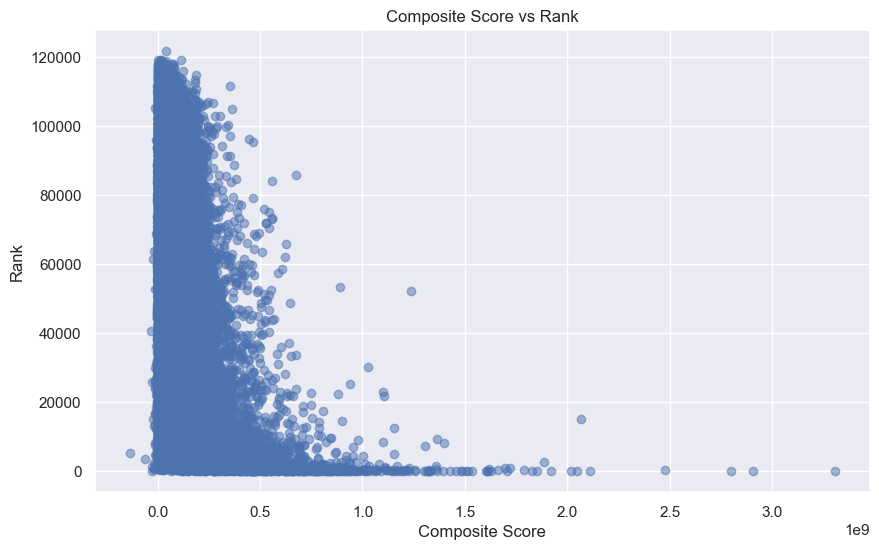

In [139]:
# Visualizing the composite score vs rank
plt.figure(figsize=(10, 6))
plt.scatter(sci100k_numeric['composite_score'], sci100k_numeric['rank'], alpha=0.5)
plt.xlabel('Composite Score')
plt.ylabel('Rank')
plt.title('Composite Score vs Rank')
plt.show()


In [173]:
sci100k_test = sci100k_numeric.drop(['np6023', 'self%', 'rank', 'nc9623','nps', 'ncs',
       'cpsf', 'ncsf', 'npsfl', 'ncsfl', 'npciting', 'cprat',
        'np6023_rw', 'nc9623_to_rw', 'nc9623_rw',
       'sm-subfield-1-frac', 'sm-subfield-2-frac', 'sm-field-frac',
       'npf'], axis =1)

In [175]:
sci100k_test.head(5)

h23        hm23  np6023 cited9623  rank sm-subfield-1  \
0  281  120.981965              1688                   2   
1  275  140.601151              2461                   1   
2  320  127.503846              2253                   1   
3  117   51.704883               379                   1   
4  249   89.943757              1067                   1   

   rank sm-subfield-1 (ns)  actyr Rank_Category  composite_score  \
0                        1     53       Top 20%   -256381.889204   
1                        2     39       Top 20%   -279083.224015   
2                        1     54       Top 20%   -276905.541754   
3                        1     32       Top 20%   -110235.028205   
4                        1     49       Top 20%   -203982.796235   

   np6023_x_self%  np6023_x_nc9623  ...  rank sm-subfield-1_x_actyr  \
0        121.7920        690615200  ...                         106   
1        389.9900        866330396  ...                          39   
2        221.5472        922083312  ...                          54   
3          7.8764        117661388  ...                          32   
4         67.3074        312606090  ...                          49   

   rank sm-subfield-1_x_npf  rank sm-subfield-1_x_composite_score  \
0                        48                          6.607761e+09   
1                       137                          2.903598e+09   
2                       115                          2.017196e+09   
3                        25                          1.090647e+09   
4                       197                          1.178957e+09   

   rank sm-subfield-1 (ns)_x_actyr  rank sm-subfield-1 (ns)_x_npf  \
0                               53                             24   
1                               78                            274   
2                               54                            115   
3                               32                             25   
4                               49                            197   

   rank sm-subfield-1 (ns)_x_composite_score  actyr_x_npf  \
0                               3.303881e+09         1272   
1                               5.807195e+09         5343   
2                               2.017196e+09         6210   
3                               1.090647e+09          800   
4                               1.178957e+09         9653   

   actyr_x_composite_score  npf_x_composite_score  Interaction_Composite_Score  
0             1.751057e+11           7.929314e+10                 2.825313e+15  
1             1.132403e+11           3.977929e+11                 2.299211e+15  
2             1.089286e+11           2.319775e+11                 1.618102e+15  
3             3.490069e+10           2.726617e+10                 1.135599e+15  
4             5.776890e+10           2.322546e+11                 9.576887e+14  

[5 rows x 309 columns]